In [63]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from PIL import Image

SCRIPT_DIR = 'C:\\Users\\Alberto\\Documents\\Universit\\Leiden\\SMA\\final simulations\\'
OUTPUT_DIR = SCRIPT_DIR + 'output\\'
LOGS_DIR = SCRIPT_DIR + 'run_logs\\'

# Analysis and Plot Functions

In [64]:
###### solar tracker distance ######
    
def solar_system_distances(df, time_index):
    #tracker distance for a given time
    current_row = df.iloc[time_index, :]
    n_tracker = df['n_stars'][0]
    
    current_time = current_row['time (Myr)']
    current_com_x = current_row['mw_com_x (kpc)']
    current_com_y = current_row['mw_com_y (kpc)']
    current_com_z = current_row['mw_com_z (kpc)']
    current_common_com_x = current_row['mw_m31_com_x (kpc)']
    current_common_com_y = current_row['mw_m31_com_y (kpc)']
    current_common_com_z = current_row['mw_m31_com_z (kpc)']
    mw_radii = []
    common_radii = []
    for i in range(n_tracker):
        particle_x = current_row['x_tr_' + str(i).zfill(5) + ' (kpc)']
        particle_y = current_row['y_tr_' + str(i).zfill(5) + ' (kpc)']
        particle_z = current_row['z_tr_' + str(i).zfill(5) + ' (kpc)']
        mw_distance = np.sqrt((current_com_x - particle_x)**2 + (current_com_y - particle_y)**2 + (current_com_z - particle_z)**2)
        common_distance = np.sqrt((current_common_com_x - particle_x)**2 + (current_common_com_y - particle_y)**2 + (current_common_com_z - particle_z)**2)
        mw_radii.append(mw_distance)
        common_radii.append(common_distance)
        
    return mw_radii, common_radii

###### galaxies com separation ######

def galaxy_com_separation(df):
    
    separation = []
    mw_common_dist = []
    m31_common_dist = []
    
    for time in range(df.shape[0]):
        current_row = df.iloc[time, :]
        current_mw_com_x = current_row['mw_com_x (kpc)']
        current_mw_com_y = current_row['mw_com_y (kpc)']
        current_mw_com_z = current_row['mw_com_z (kpc)']
        current_m31_com_x = current_row['m31_com_x (kpc)']
        current_m31_com_y = current_row['m31_com_y (kpc)']
        current_m31_com_z = current_row['m31_com_z (kpc)']
        current_common_com_x = current_row['mw_m31_com_x (kpc)']
        current_common_com_y = current_row['mw_m31_com_y (kpc)']
        current_common_com_z = current_row['mw_m31_com_z (kpc)']
        
        sep = np.sqrt((current_mw_com_x - current_m31_com_x)**2 + \
                      (current_mw_com_y - current_m31_com_y)**2 + \
                      (current_mw_com_z - current_m31_com_z)**2)
        mw_common = np.sqrt((current_mw_com_x - current_common_com_x)**2 + \
                            (current_mw_com_y - current_common_com_y)**2 + \
                            (current_mw_com_z - current_common_com_z)**2)
        m31_common = np.sqrt((current_m31_com_x - current_common_com_x)**2 + \
                             (current_m31_com_y - current_common_com_y)**2 + \
                             (current_m31_com_z - current_common_com_z)**2)
        
        separation.append(sep)
        mw_common_dist.append(mw_common)
        m31_common_dist.append(m31_common)
        
    return separation, mw_common_dist, m31_common_dist

###### galaxies com separation plot ######

def plot_separation(ax, time, separation, color):
    ax.plot(df['time (Myr)'], df['sep (kpc)'], c=color, label=sep_dir)
    
    
###### solar trackers histogram ######

def solar_histogram(ax, df, time_index, n_tracker=1000):
    radii = solar_system_radii(df, time_index, n_tracker)
    r_std = np.std(radii)
    r_min = min(radii)
    r_max = max(radii)
    ax.hist(radii, bins=50, histtype='step', range=(r_min-r_std,r_max+r_std))
    

###### solar trackers mean distance ######
    
def solar_system_mean_distance(df, time_index_list=None):
    mean_list = []
    std_list = []
    mean_m_std = []
    mean_p_std = []
    
    mean_common_list = []
    std_common_list = []
    mean_m_std_common = []
    mean_p_std_common = []
    
    time_list = [time for time in df['time (Myr)']]
    
    if not time_index_list == None:
        time_indexes = range(df.shape[0])
    else:
        time_indexes = time_index_list

    for time_idx in time_indexes:
        print(time_idx, end='\r')
        mw_radii, common_radii = solar_system_radii(df, time_idx)
        mean_list.append(np.mean(mw_radii))
        std_list.append(np.std(mw_radii))
        mean_m_std.append(np.mean(mw_radii) - np.std(mw_radii))
        mean_p_std.append(np.mean(mw_radii) + np.std(mw_radii))
        
        mean_common_list.append(np.mean(common_radii))
        std_common_list.append(np.std(common_radii))
        mean_m_std_common.append(np.mean(common_radii) - np.std(common_radii))
        mean_p_std_common.append(np.mean(common_radii) + np.std(common_radii))
    
    return mean_list, std_list, mean_m_std, mean_p_std, mean_common_list, std_common_list, mean_m_std_common, mean_p_std_common


###### solar distance histogram ######

def solar_histogram(ax, df, time_index, n_tracker=1000):
    radii = solar_system_radii(df, time_index, n_tracker)
    r_std = np.std(radii)
    r_min = min(radii)
    r_max = max(radii)
    ax.hist(radii, bins=50, histtype='step', range=(r_min-r_std,r_max+r_std))

In [58]:
###### choose a run ######

RUN_ID = 's72_131220_0007igm'
    
OUTPUT_SUBDIR = OUTPUT_DIR + RUN_ID + '\\'

if not os.path.exists(OUTPUT_SUBDIR):
    os.makedirs(OUTPUT_SUBDIR, exist_ok=True)
    
df_run = pd.read_csv(LOGS_DIR + RUN_ID + '_merger_logs.csv')

#df_sliced = df_run[:3002]
df_sliced = df_run

C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [57]:
df_run['time (Myr)']

0           0.000000
1          24.999980
2          49.999959
3          74.999939
4          99.999919
            ...     
1197    29924.975727
1198    29949.975707
1199    29974.975686
1200    29999.975666
1201    30024.975646
Name: time (Myr), Length: 1202, dtype: float64

In [9]:
for col in df_sliced.columns:
    print(col)

mw_n_halo
mw_disk_number_of_particles
mw_disk_mass (MSun)
mw_bulge_number_of_particles
m31_n_halo
m31_disk_number_of_particles
m31_disk_mass (MSun)
m31_bulge_number_of_particles
t final (Myr)
t step (Myr)
m31_radvel_factor (* 117 km/s)
m31_transvel_factor (* 42 km/s)
add_solar
n_stars
solar_radial_distance (kpc)
solar_system_radius (kpc)
add_igm
mw_mass
m31_mass
time (Myr)
mw_com_x (kpc)
mw_com_y (kpc)
mw_com_z (kpc)
m31_com_x (kpc)
m31_com_y (kpc)
m31_com_z (kpc)
mw_m31_com_x (kpc)
mw_m31_com_y (kpc)
mw_m31_com_z (kpc)
solar_com_x (kpc)
solar_com_y (kpc)
solar_com_z (kpc)
x_tr_00000 (kpc)
y_tr_00000 (kpc)
z_tr_00000 (kpc)
x_tr_00001 (kpc)
y_tr_00001 (kpc)
z_tr_00001 (kpc)
x_tr_00002 (kpc)
y_tr_00002 (kpc)
z_tr_00002 (kpc)
x_tr_00003 (kpc)
y_tr_00003 (kpc)
z_tr_00003 (kpc)
x_tr_00004 (kpc)
y_tr_00004 (kpc)
z_tr_00004 (kpc)
x_tr_00005 (kpc)
y_tr_00005 (kpc)
z_tr_00005 (kpc)
x_tr_00006 (kpc)
y_tr_00006 (kpc)
z_tr_00006 (kpc)
x_tr_00007 (kpc)
y_tr_00007 (kpc)
z_tr_00007 (kpc)
x_tr_00008 (

y_tr_00651 (kpc)
z_tr_00651 (kpc)
x_tr_00652 (kpc)
y_tr_00652 (kpc)
z_tr_00652 (kpc)
x_tr_00653 (kpc)
y_tr_00653 (kpc)
z_tr_00653 (kpc)
x_tr_00654 (kpc)
y_tr_00654 (kpc)
z_tr_00654 (kpc)
x_tr_00655 (kpc)
y_tr_00655 (kpc)
z_tr_00655 (kpc)
x_tr_00656 (kpc)
y_tr_00656 (kpc)
z_tr_00656 (kpc)
x_tr_00657 (kpc)
y_tr_00657 (kpc)
z_tr_00657 (kpc)
x_tr_00658 (kpc)
y_tr_00658 (kpc)
z_tr_00658 (kpc)
x_tr_00659 (kpc)
y_tr_00659 (kpc)
z_tr_00659 (kpc)
x_tr_00660 (kpc)
y_tr_00660 (kpc)
z_tr_00660 (kpc)
x_tr_00661 (kpc)
y_tr_00661 (kpc)
z_tr_00661 (kpc)
x_tr_00662 (kpc)
y_tr_00662 (kpc)
z_tr_00662 (kpc)
x_tr_00663 (kpc)
y_tr_00663 (kpc)
z_tr_00663 (kpc)
x_tr_00664 (kpc)
y_tr_00664 (kpc)
z_tr_00664 (kpc)
x_tr_00665 (kpc)
y_tr_00665 (kpc)
z_tr_00665 (kpc)
x_tr_00666 (kpc)
y_tr_00666 (kpc)
z_tr_00666 (kpc)
x_tr_00667 (kpc)
y_tr_00667 (kpc)
z_tr_00667 (kpc)
x_tr_00668 (kpc)
y_tr_00668 (kpc)
z_tr_00668 (kpc)
x_tr_00669 (kpc)
y_tr_00669 (kpc)
z_tr_00669 (kpc)
x_tr_00670 (kpc)
y_tr_00670 (kpc)
z_tr_00670 (kp

# Main

In [59]:
time_list = [time for time in df_sliced['time (Myr)']]

<IPython.core.display.Javascript object>


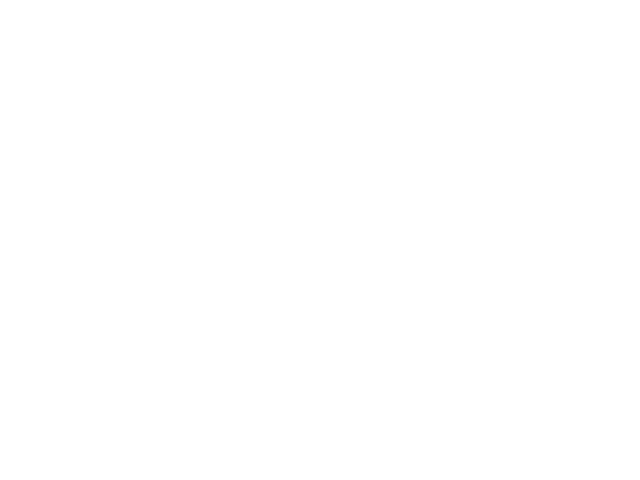

<IPython.core.display.Javascript object>


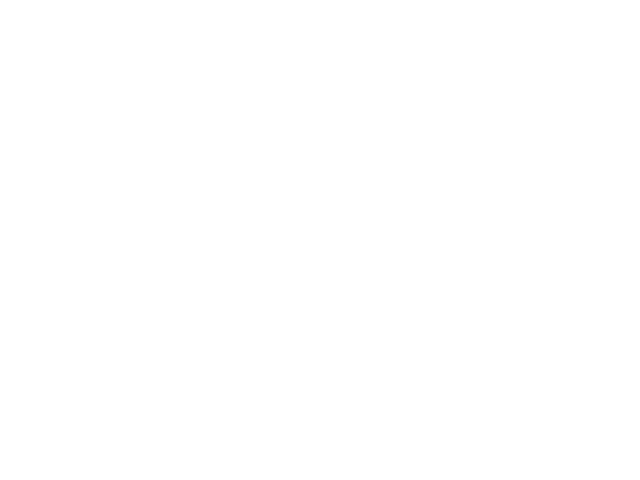

In [60]:
#galaxy color: mw -> tab:blue; m31 -> tab:orange; common stuff -> tab:green; solar trackers -> tab:red

###### separation plot ######

sep, mw_common, m31_common = galaxy_com_separation(df_sliced)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time_list, mw_common, c='tab:blue', label='Distance common com - MW com')
ax.plot(time_list, m31_common, c='tab:orange', label='Distance common com - M31 com')
ax.plot(time_list, sep, c='tab:green', label='Separation')

ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Distance (kpc)')
plt.legend(loc='upper right')
plt.title('Center of mass separation\n' + RUN_ID)
plt.savefig(OUTPUT_SUBDIR + RUN_ID + '_separation')
plt.close()


###### galaxy com trajectory ######

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-350, 350)
ax.set_ylim(-350, 350)

ax.plot(df_sliced['mw_com_x (kpc)'], df_sliced['mw_com_y (kpc)'], c='tab:blue', label='MW center of mass')
ax.plot(df_sliced['m31_com_x (kpc)'], df_sliced['m31_com_y (kpc)'], c='tab:orange', label='M31 center of mass')
ax.plot(df_sliced['mw_m31_com_x (kpc)'], df_sliced['mw_m31_com_y (kpc)'], c='tab:green', label='Common center of mass')

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
plt.legend(loc='upper right')
plt.title('Center of mass xy trajectory\n' + RUN_ID)
plt.savefig(OUTPUT_SUBDIR + RUN_ID + '_com_trajectory')
plt.close()

In [ ]:
###### solar position mean distance ######

fig = plt.figure()
ax = fig.add_subplot(111)

mean_list, std_list, mean_m_std, mean_p_std, \
    mean_common_list, std_common_list, mean_m_std_common, mean_p_std_common = solar_system_mean_distance(df_sliced)

ax.plot(time_list, mean_list, c='tab:blue', label='Mean distance from MW com')
ax.fill_between(time_list, mean_m_std, y2=mean_p_std, color='tab:blue', alpha=0.2)

ax.plot(time_list, mean_common_list, c='tab:red', label='Mean distance from common com')
ax.fill_between(time_list, mean_m_std_common, y2=mean_p_std_common, color='tab:red', alpha=0.2) 

ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Distance (kpc)')
plt.legend(loc='upper right')
plt.title('Solar trackers mean distance\n' + RUN_ID)
plt.savefig(OUTPUT_SUBDIR + RUN_ID + '_solar_system_mean_distance')
plt.close()

In [ ]:
###### separation plot derivative ######

sep, mw_common, m31_common = galaxy_com_separation(df_sliced)

fig = plt.figure()
ax = fig.add_subplot(111)

der = np.diff(sep)/np.diff(time_list)
y0 = [0 for i in range(len(time_list[:-1]))]

#ax.plot(time_list, mw_common, c='tab:blue', label='Distance common com - MW com')
#ax.plot(time_list, m31_common, c='tab:orange', label='Distance common com - M31 com')
#ax.plot(time_list, sep, c='tab:green', label='Separation')
ax.plot(time_list[:-1], der, c='tab:purple', label='Derivative')
ax.plot(time_list[:-1], y0, c='k', alpha=0.5)

#finds times where derivative changes sign
idx = np.argwhere(np.diff(np.sign(der - y0))).flatten()
for i in idx:
    print(time_list[i])

ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Derivative')
plt.legend(loc='upper right')
plt.title('Center of mass separation derivative\n' + RUN_ID)
plt.savefig(OUTPUT_SUBDIR + RUN_ID + '_separation_derivative')
plt.close()

# Solar System Histograms

s72_121220_0001soligm


C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1199 1509 1695 2279 2498 2514 2551    0   -1]


<IPython.core.display.Javascript object>


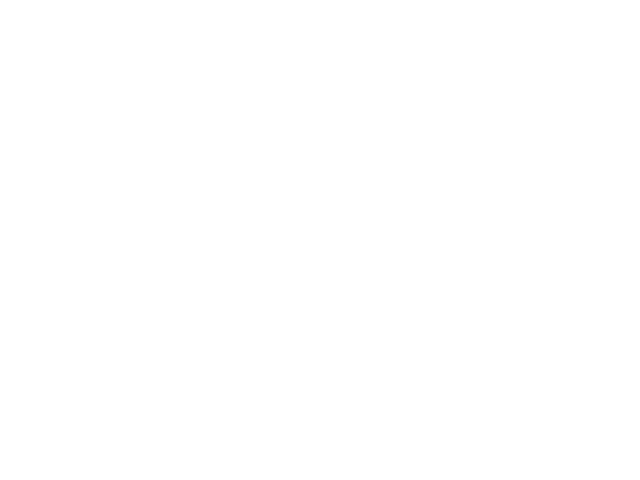

<IPython.core.display.Javascript object>


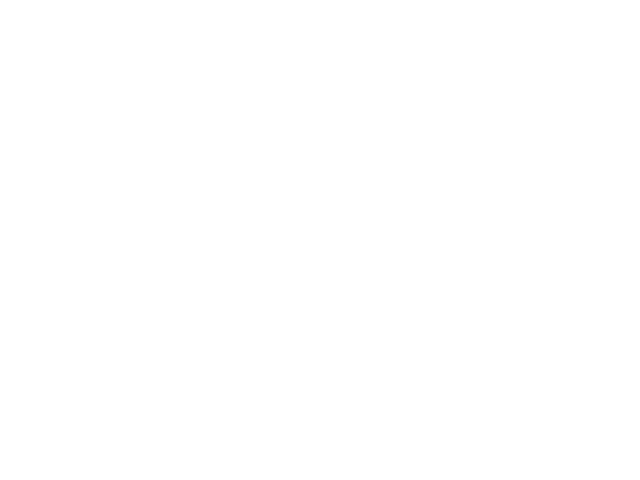

<IPython.core.display.Javascript object>


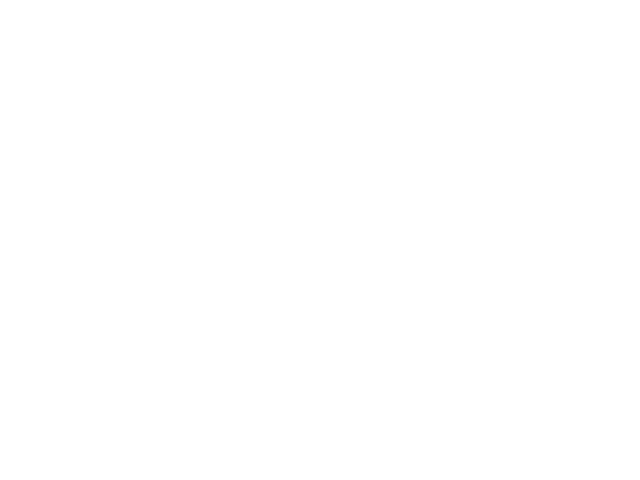

<IPython.core.display.Javascript object>


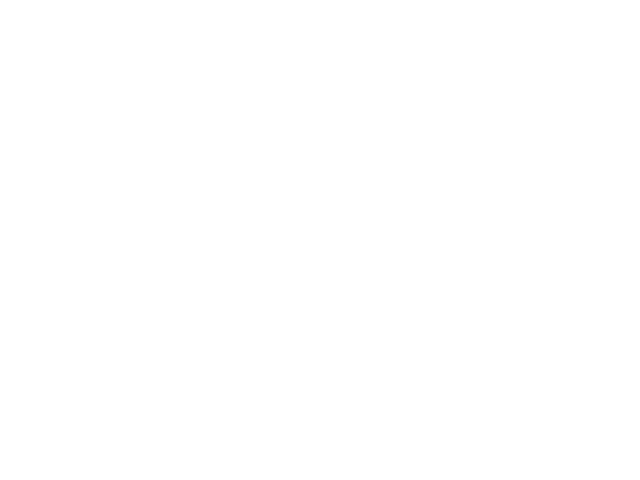

<IPython.core.display.Javascript object>


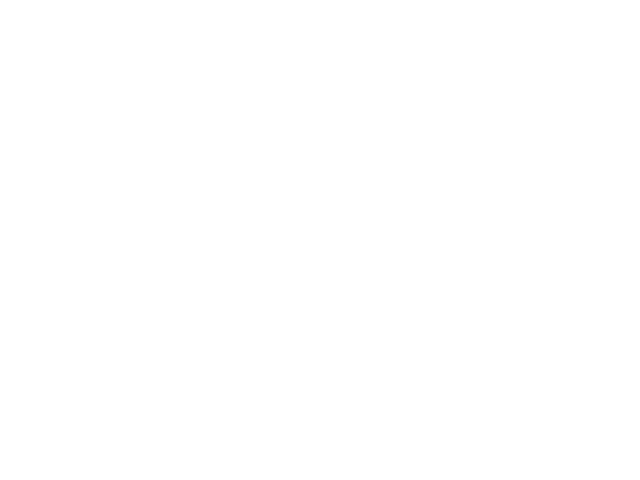

<IPython.core.display.Javascript object>


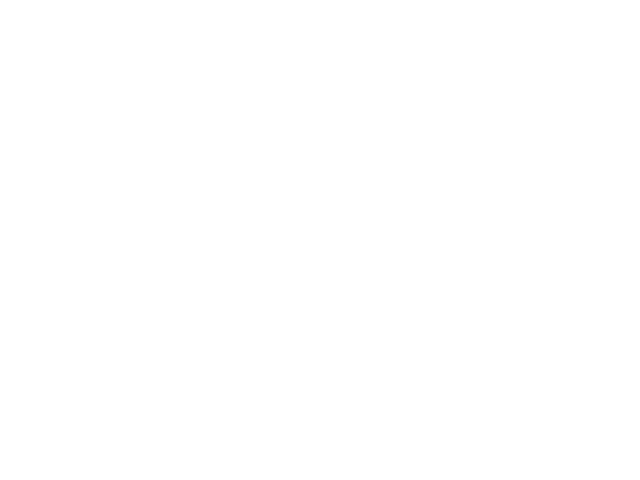

<IPython.core.display.Javascript object>


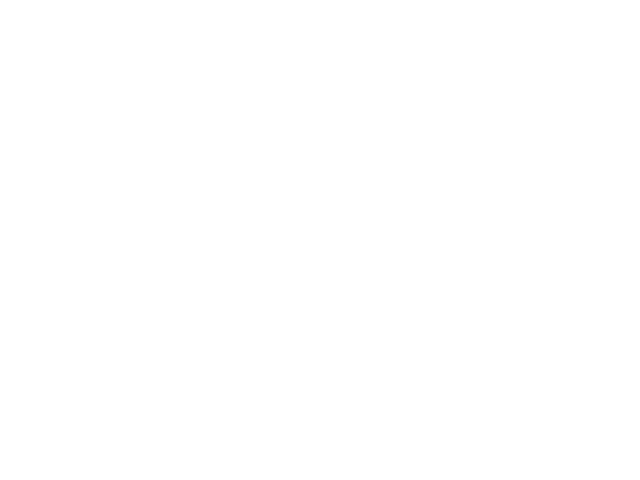

<IPython.core.display.Javascript object>


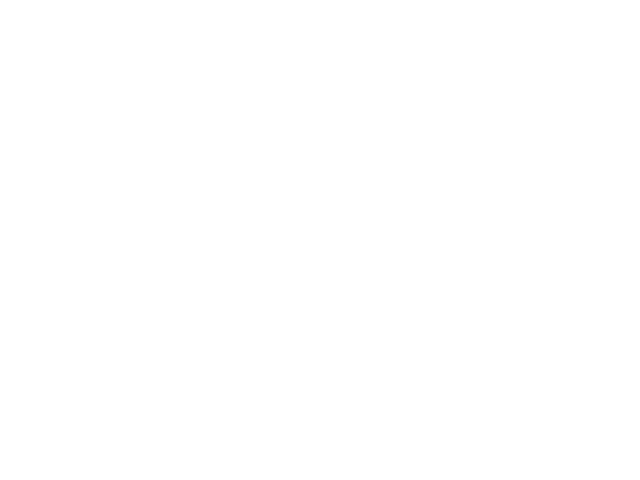

<IPython.core.display.Javascript object>


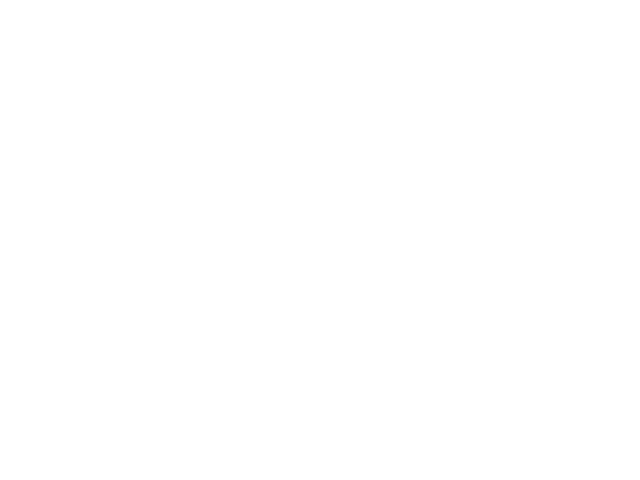

<IPython.core.display.Javascript object>


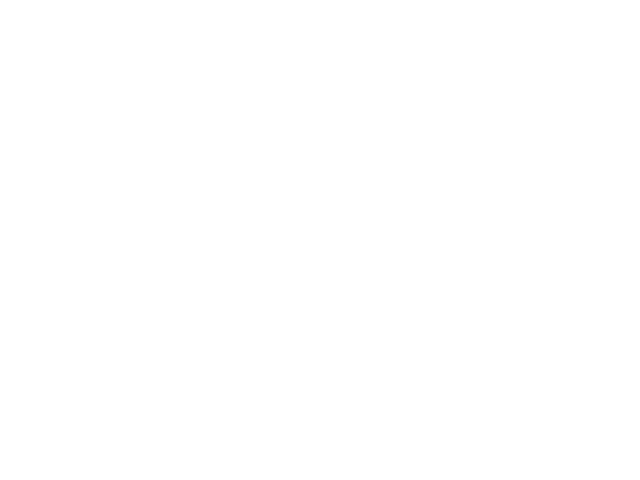

<IPython.core.display.Javascript object>


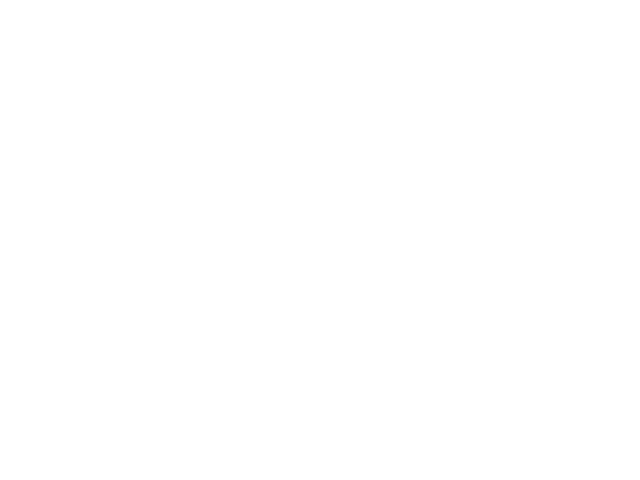

<IPython.core.display.Javascript object>


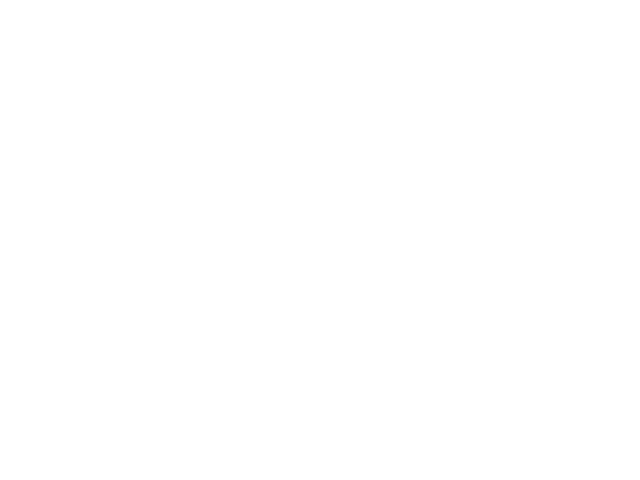

<IPython.core.display.Javascript object>


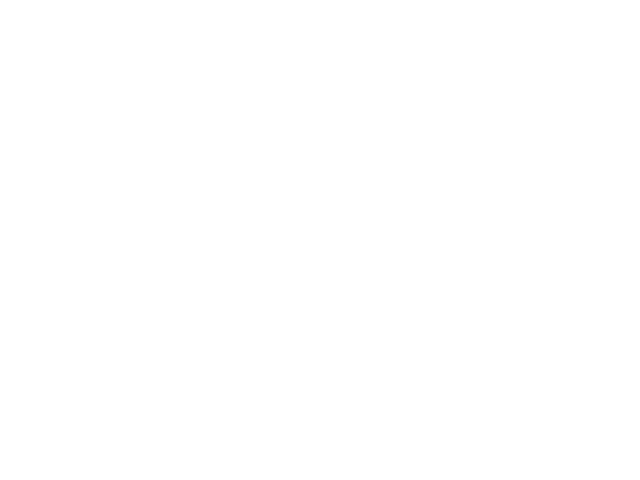

<IPython.core.display.Javascript object>


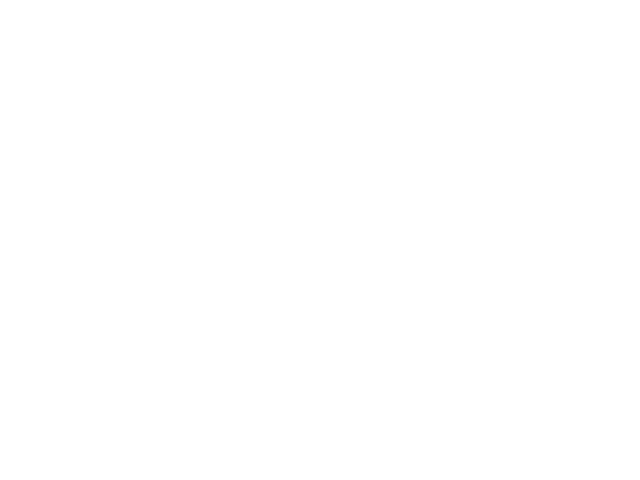

<IPython.core.display.Javascript object>


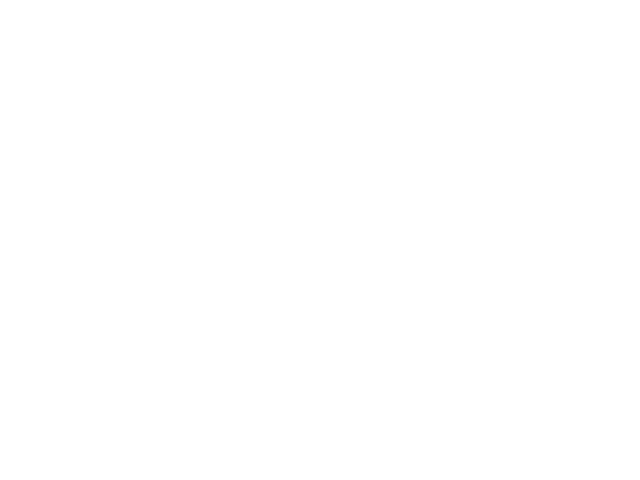

<IPython.core.display.Javascript object>


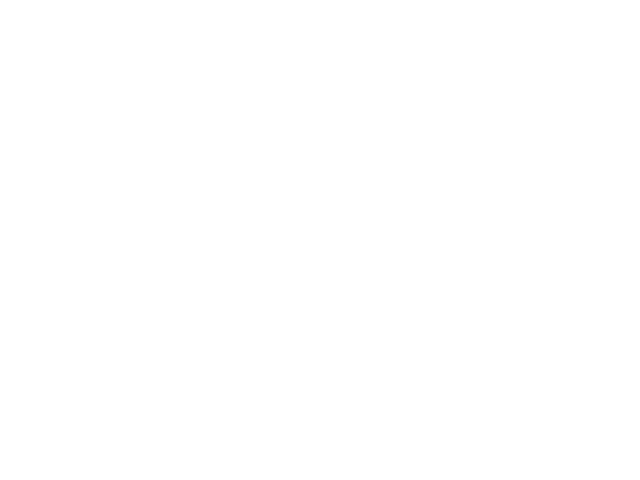

<IPython.core.display.Javascript object>


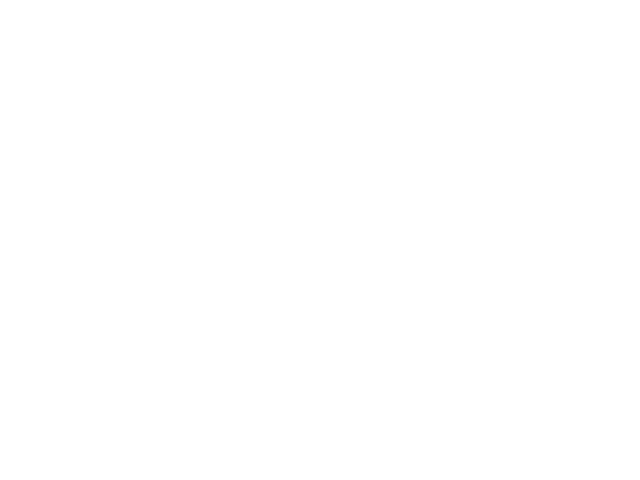

<IPython.core.display.Javascript object>


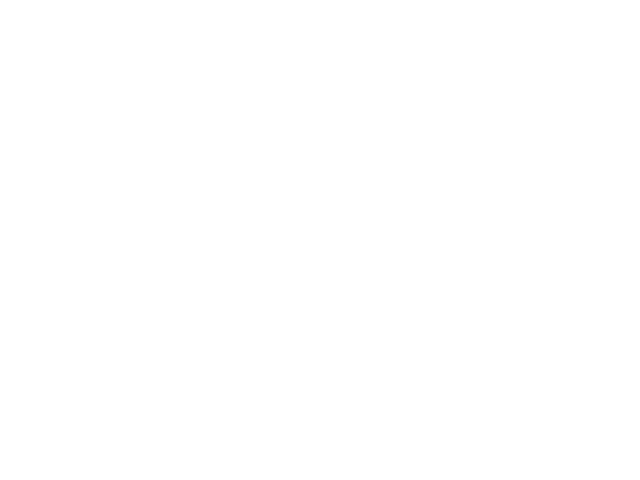

s72_111220_0010soligm


C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1215 1544 1745 1875 1882 2307 2367 2508 2544 2591 2599    0   -1]


<IPython.core.display.Javascript object>


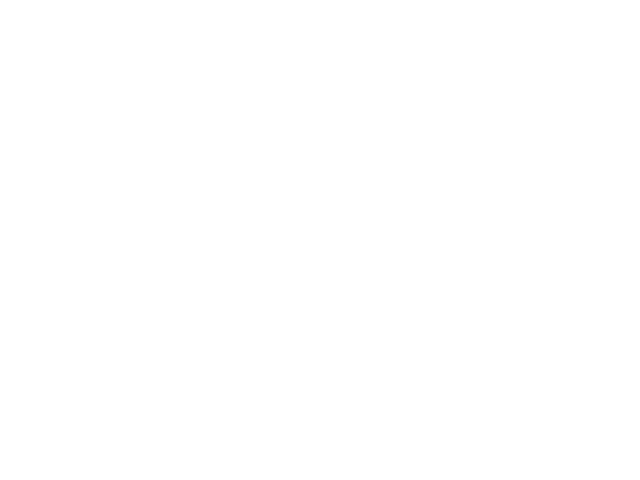

<IPython.core.display.Javascript object>


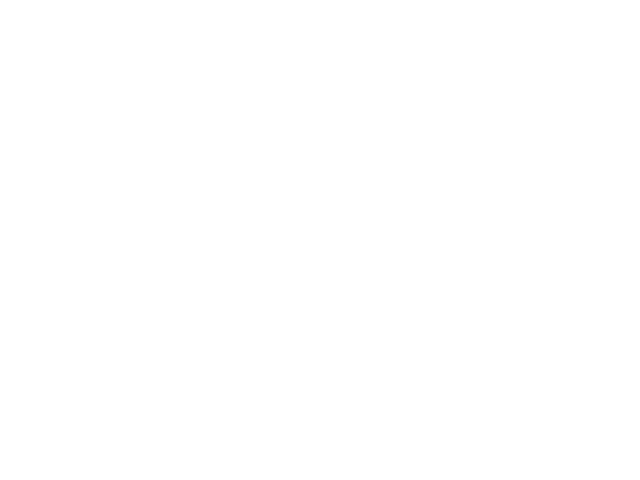

<IPython.core.display.Javascript object>


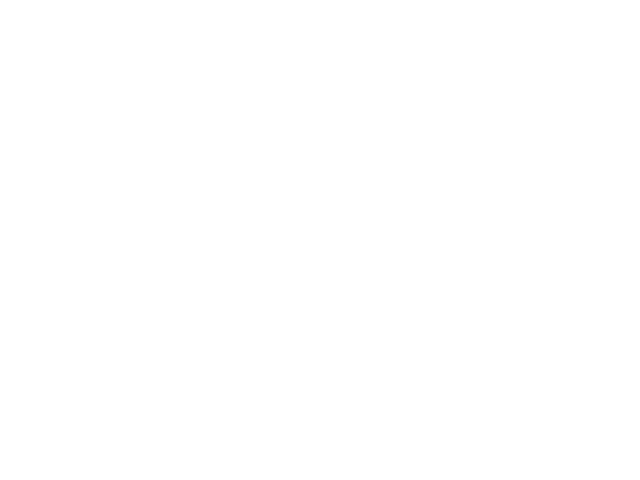

<IPython.core.display.Javascript object>


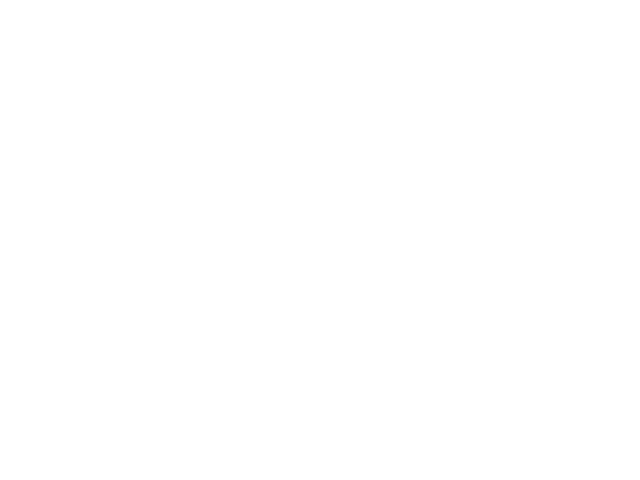

<IPython.core.display.Javascript object>


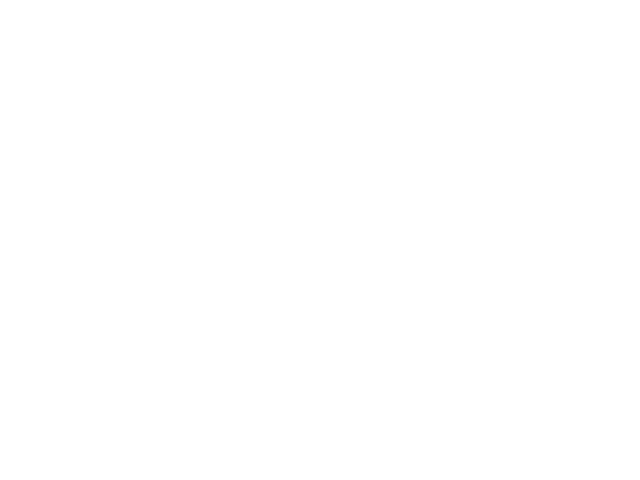

<IPython.core.display.Javascript object>


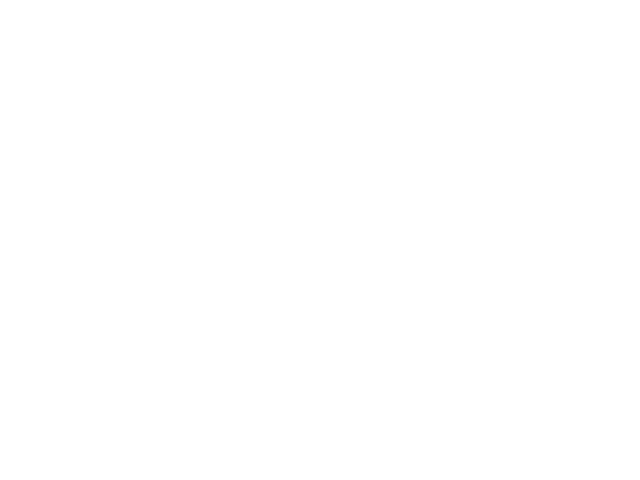

<IPython.core.display.Javascript object>


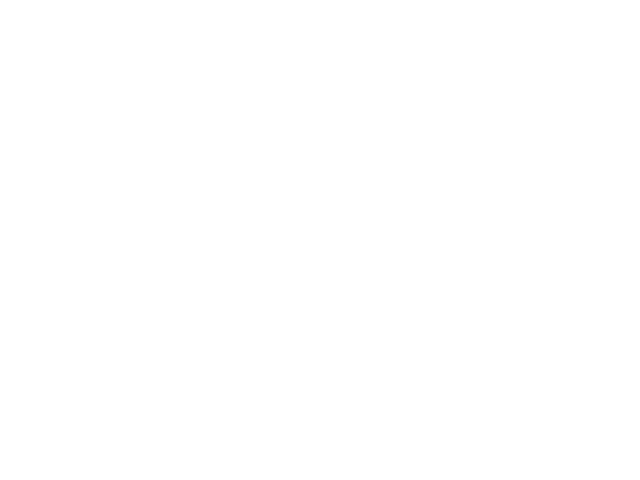

<IPython.core.display.Javascript object>


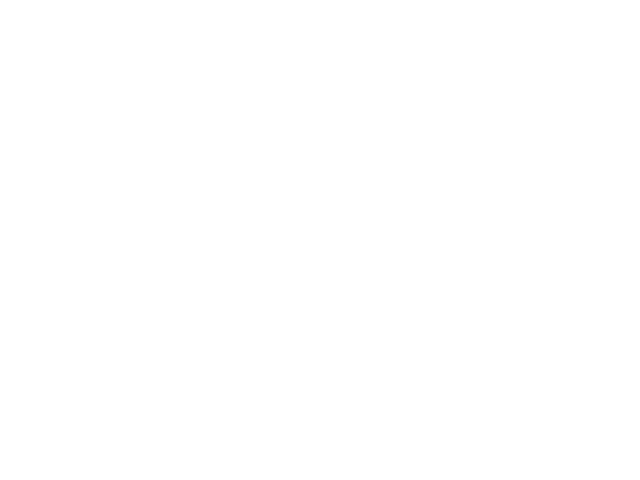

<IPython.core.display.Javascript object>


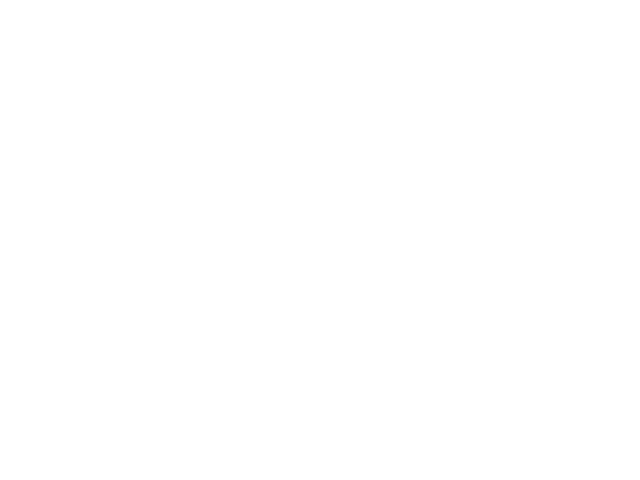

<IPython.core.display.Javascript object>


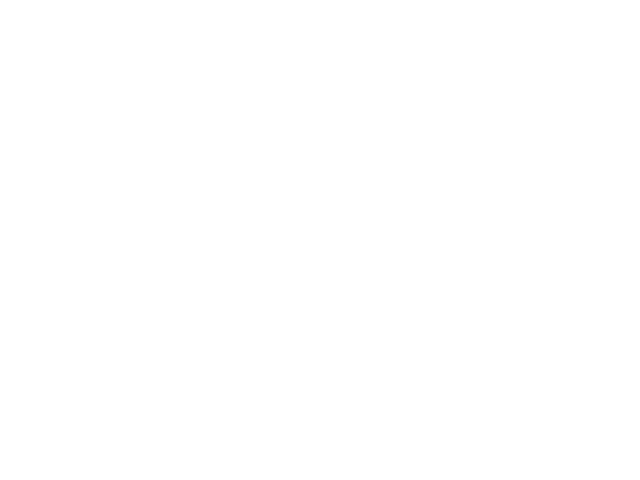

<IPython.core.display.Javascript object>


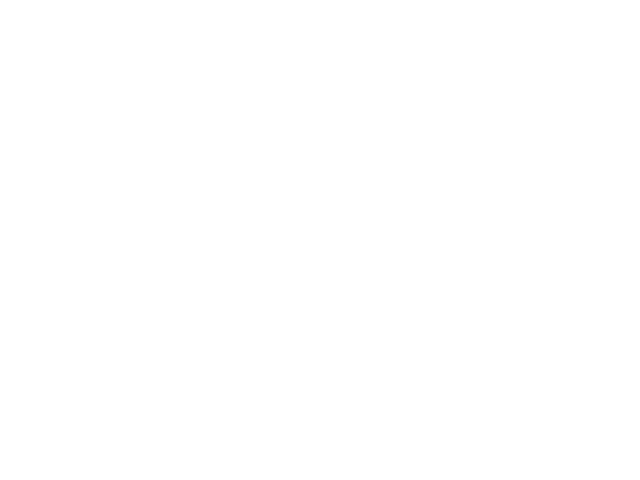

<IPython.core.display.Javascript object>


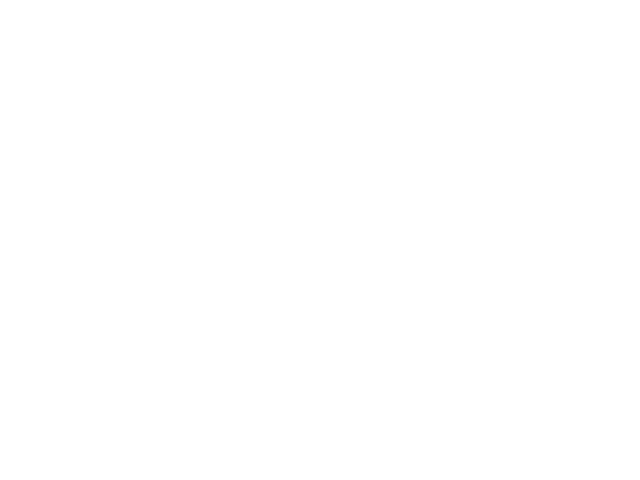

<IPython.core.display.Javascript object>


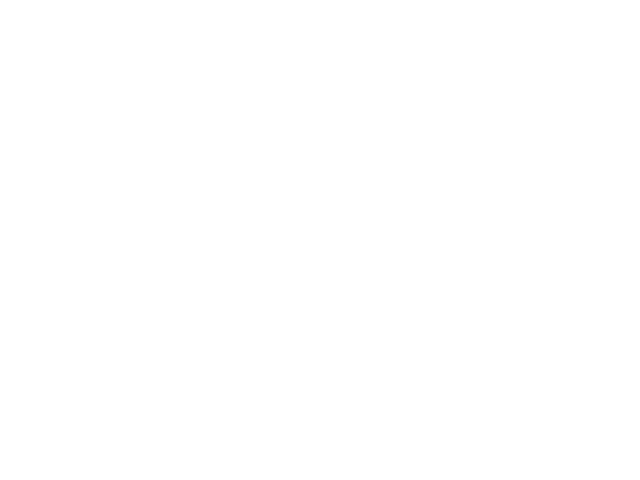

<IPython.core.display.Javascript object>


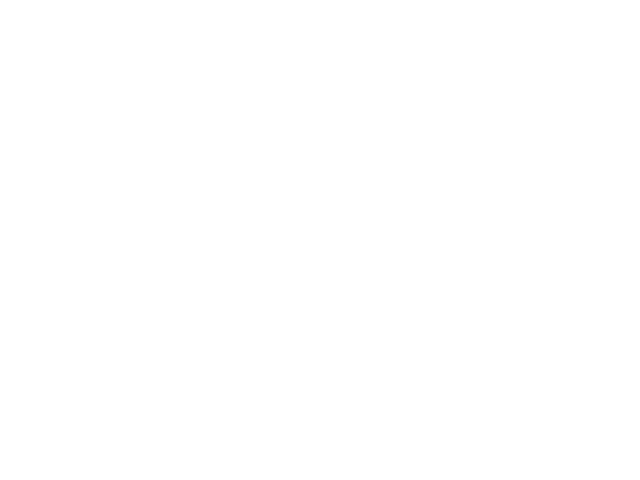

<IPython.core.display.Javascript object>


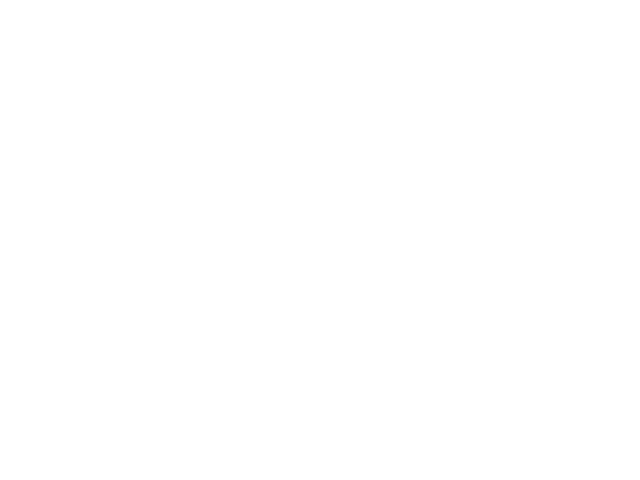

<IPython.core.display.Javascript object>


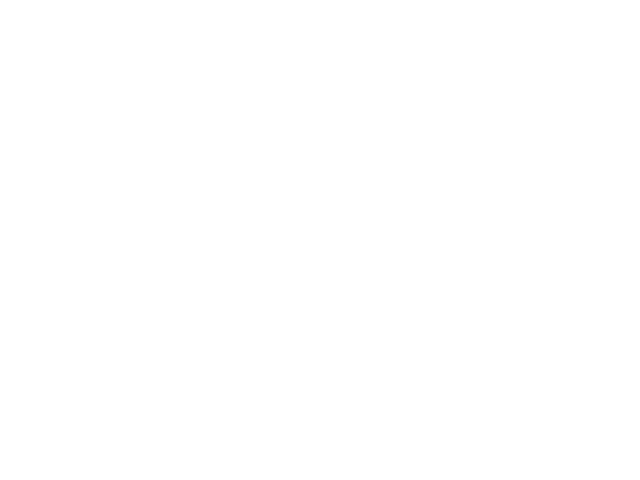

<IPython.core.display.Javascript object>


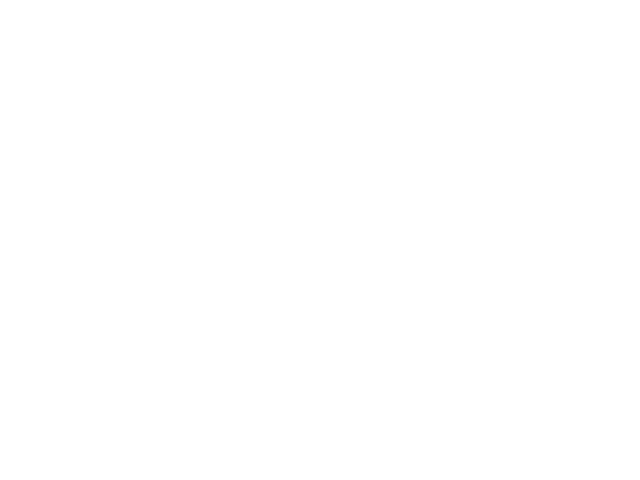

<IPython.core.display.Javascript object>


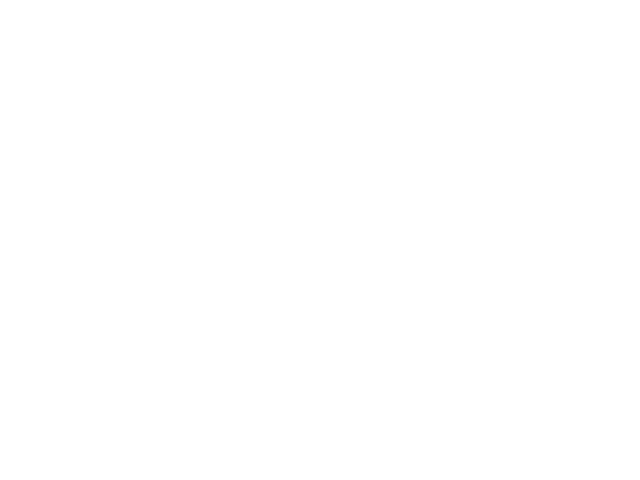

<IPython.core.display.Javascript object>


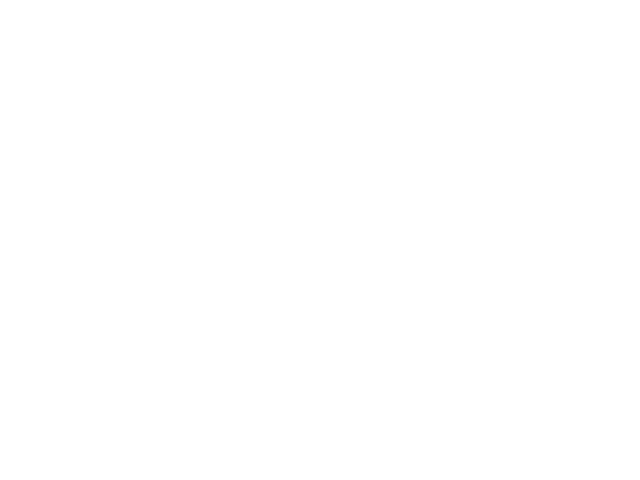

<IPython.core.display.Javascript object>


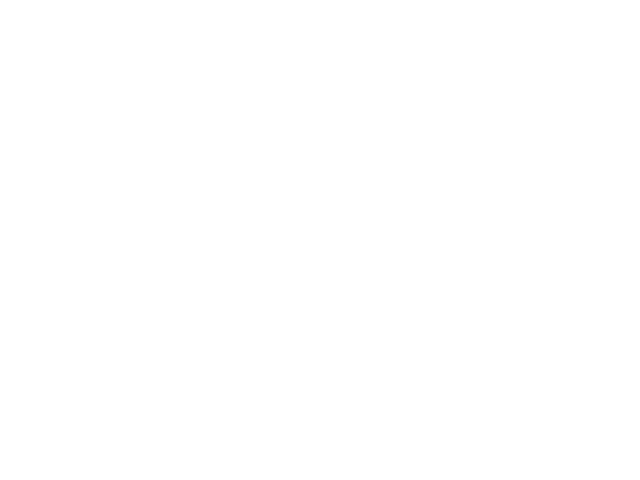

<IPython.core.display.Javascript object>


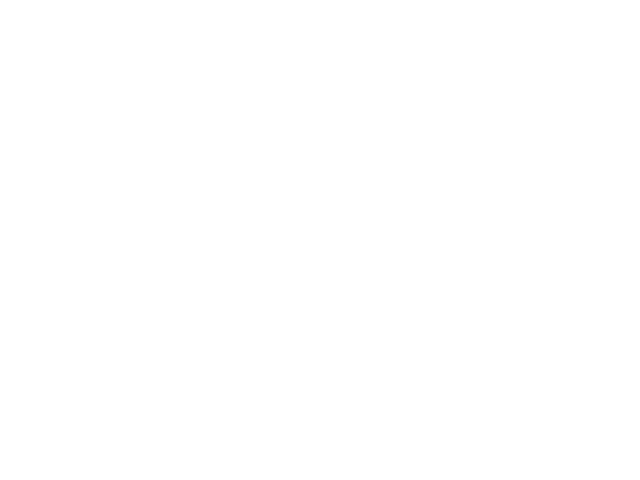

<IPython.core.display.Javascript object>


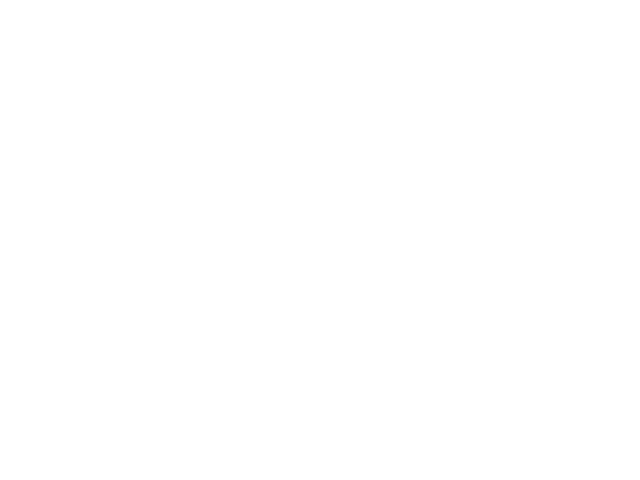

<IPython.core.display.Javascript object>


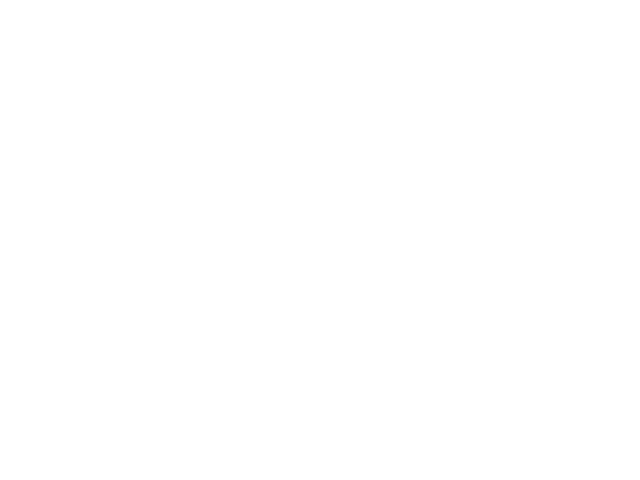

<IPython.core.display.Javascript object>


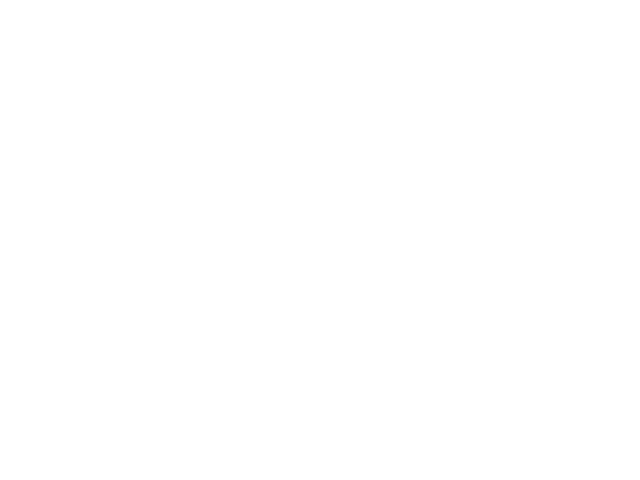

<IPython.core.display.Javascript object>


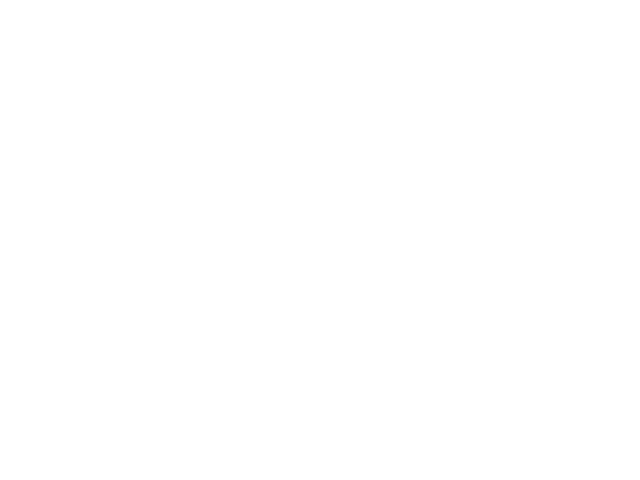

<IPython.core.display.Javascript object>


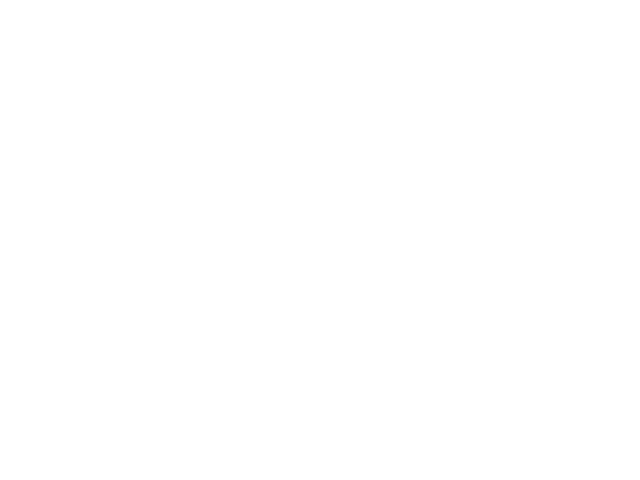

s72_121220_0005soligm


C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1237 1585 1806 1934 1966 2401 2641    0   -1]


<IPython.core.display.Javascript object>


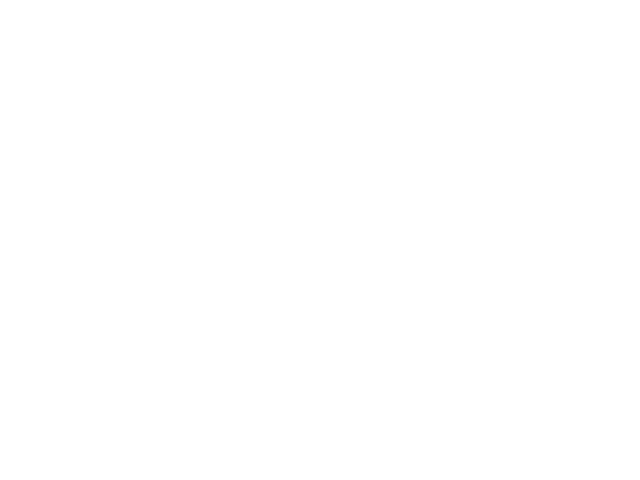

<IPython.core.display.Javascript object>


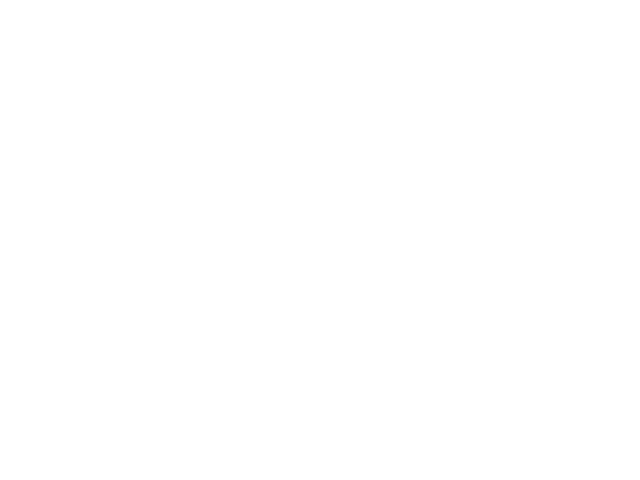

<IPython.core.display.Javascript object>


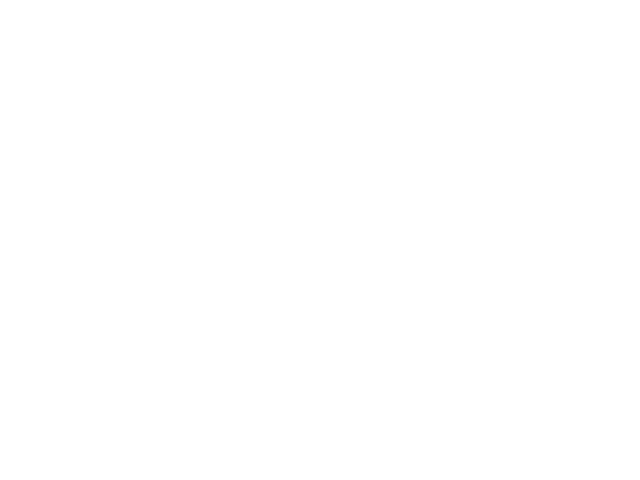

<IPython.core.display.Javascript object>


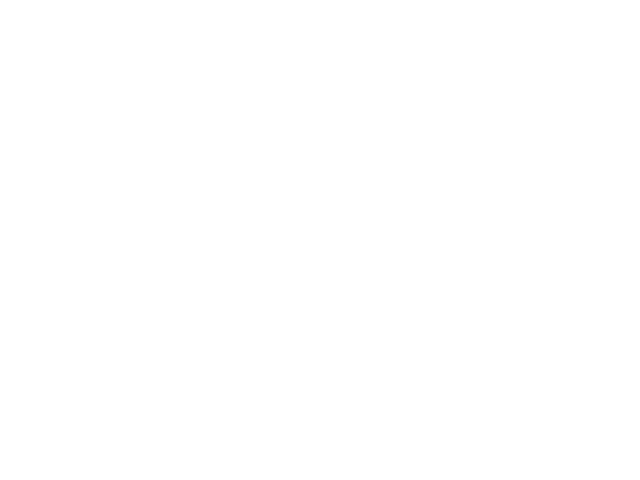

<IPython.core.display.Javascript object>


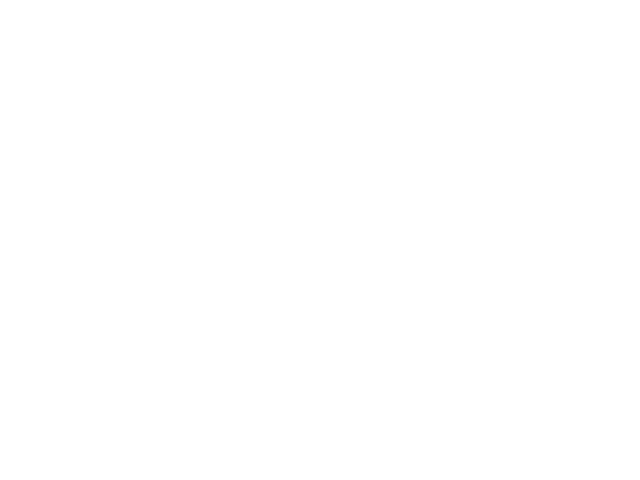

<IPython.core.display.Javascript object>


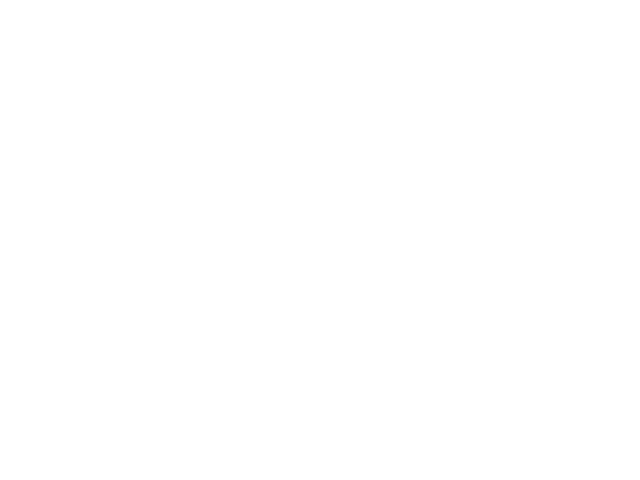

<IPython.core.display.Javascript object>


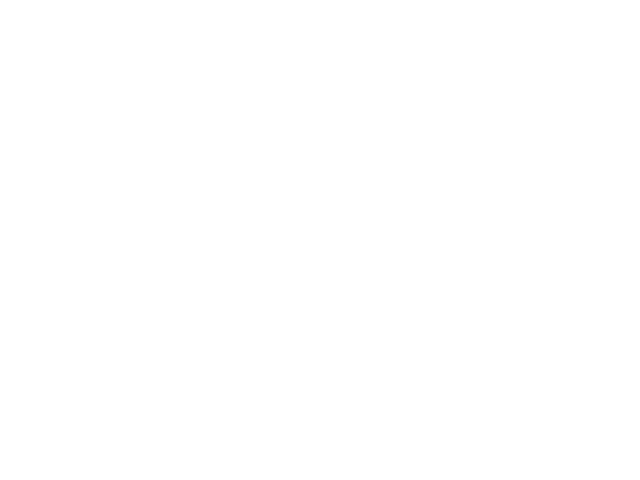

<IPython.core.display.Javascript object>


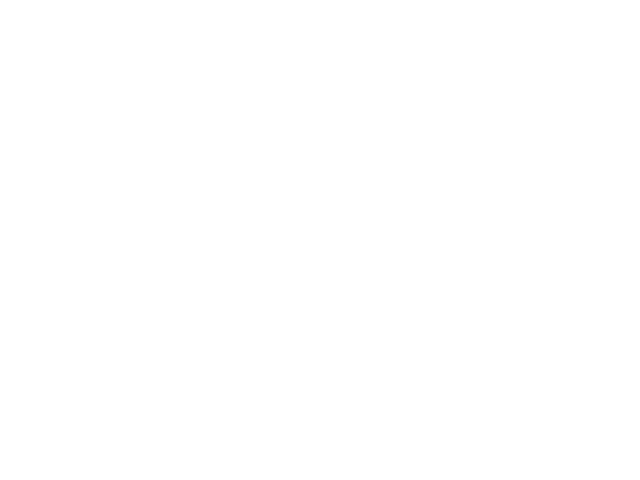

<IPython.core.display.Javascript object>


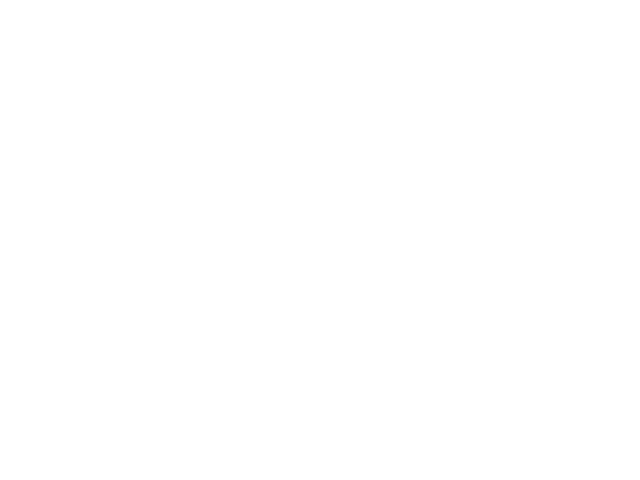

<IPython.core.display.Javascript object>


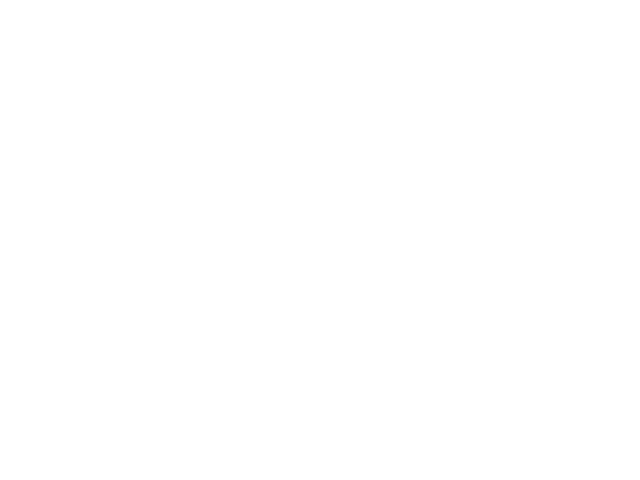

<IPython.core.display.Javascript object>


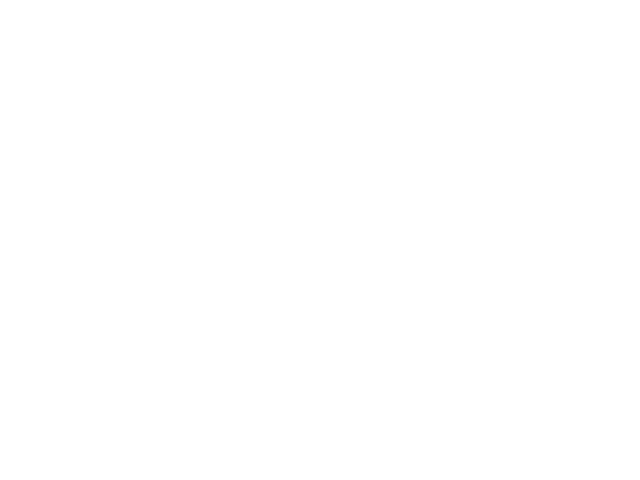

<IPython.core.display.Javascript object>


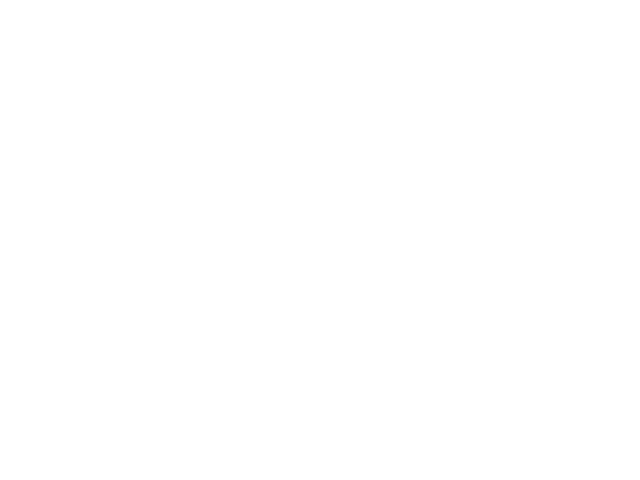

<IPython.core.display.Javascript object>


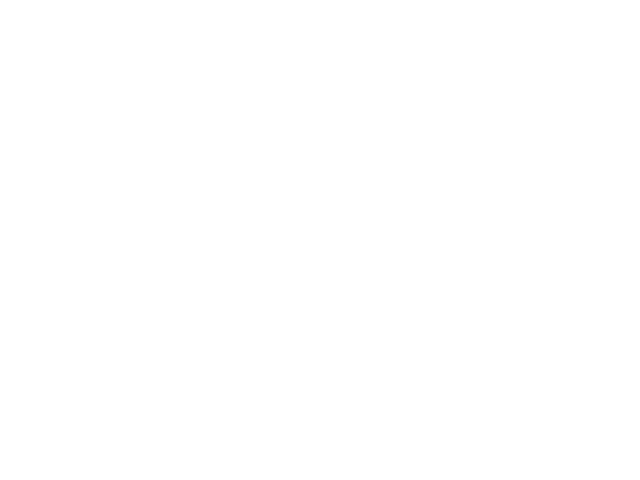

<IPython.core.display.Javascript object>


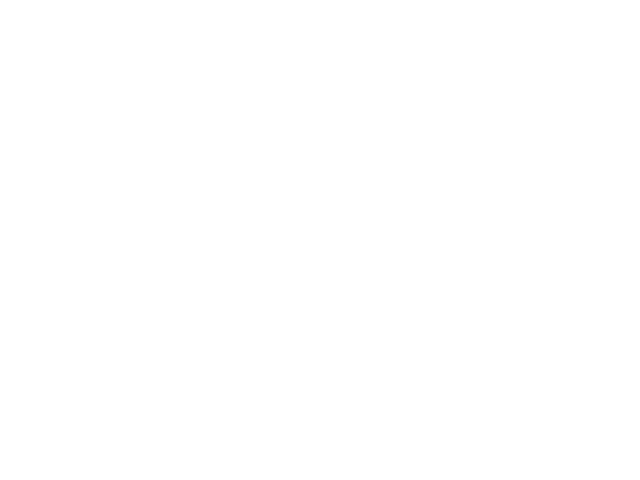

<IPython.core.display.Javascript object>


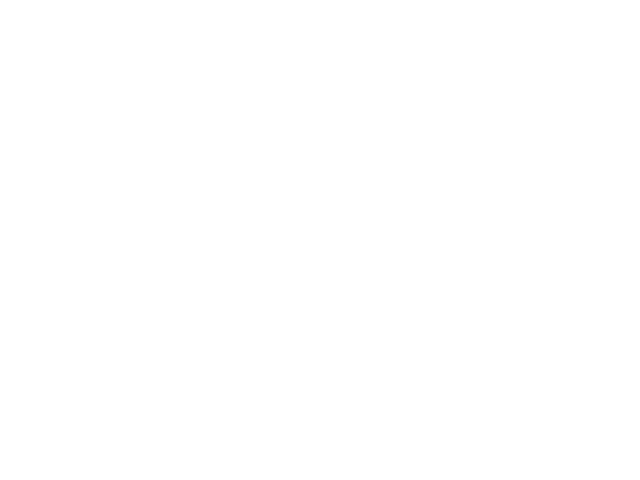

<IPython.core.display.Javascript object>


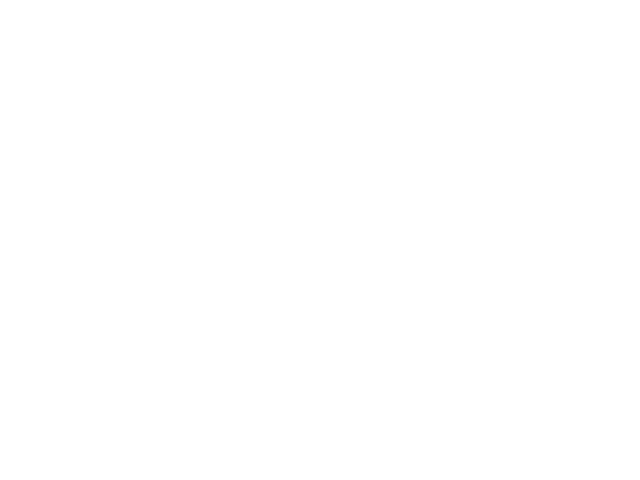

<IPython.core.display.Javascript object>


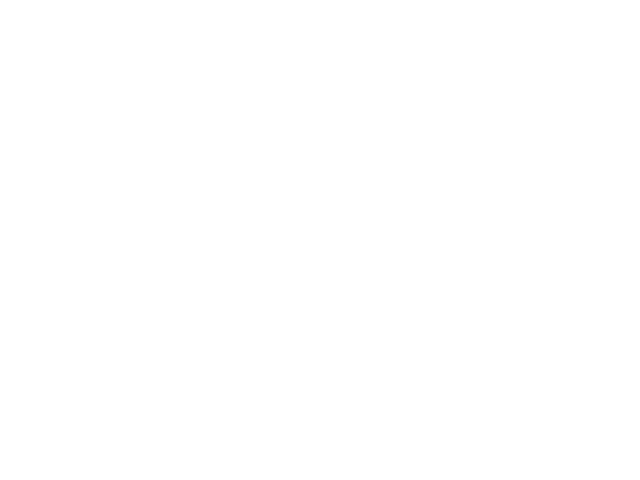

<IPython.core.display.Javascript object>


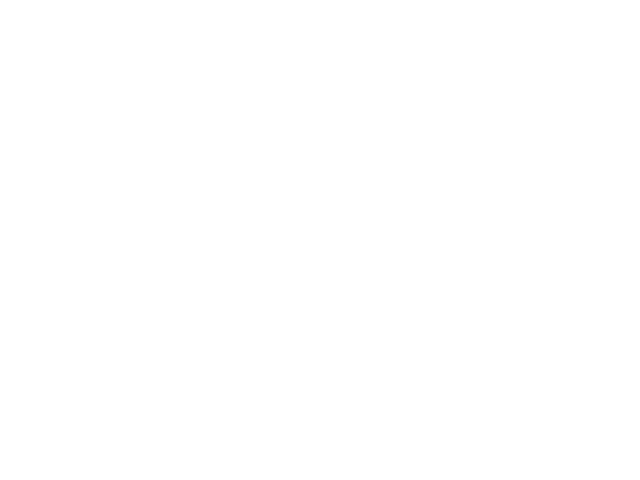

s72_121220_0004soligm


C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1260 1629 1871 1998 2037 2279 2323 2350 2542    0   -1]


<IPython.core.display.Javascript object>


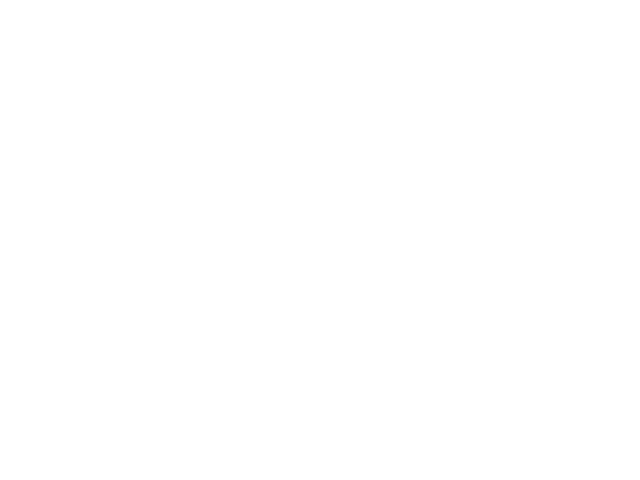

<IPython.core.display.Javascript object>


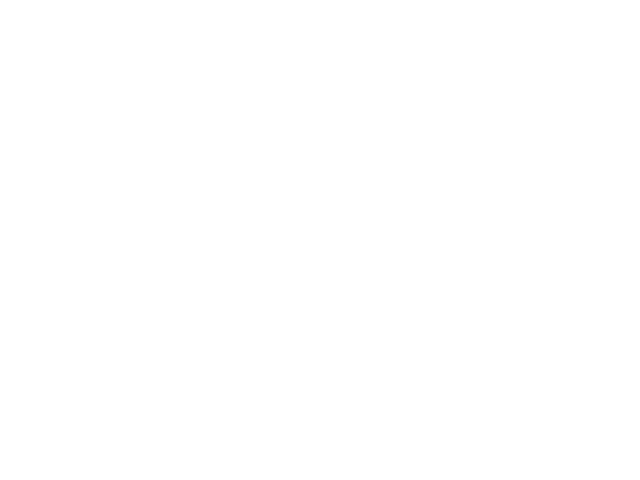

<IPython.core.display.Javascript object>


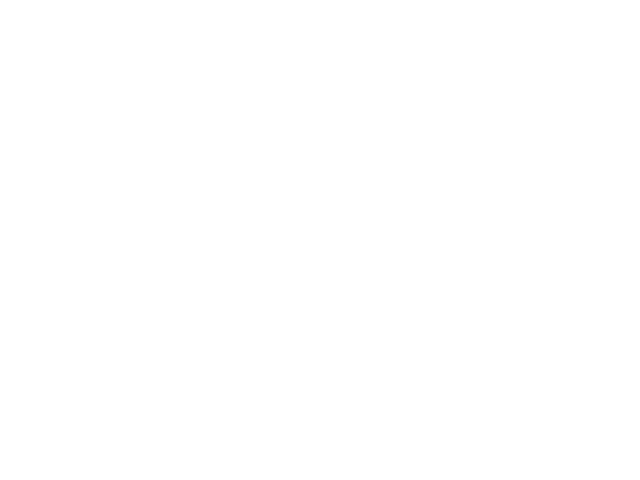

<IPython.core.display.Javascript object>


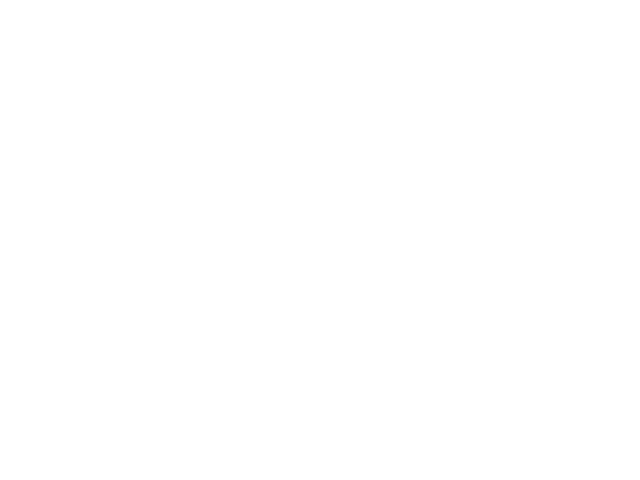

<IPython.core.display.Javascript object>


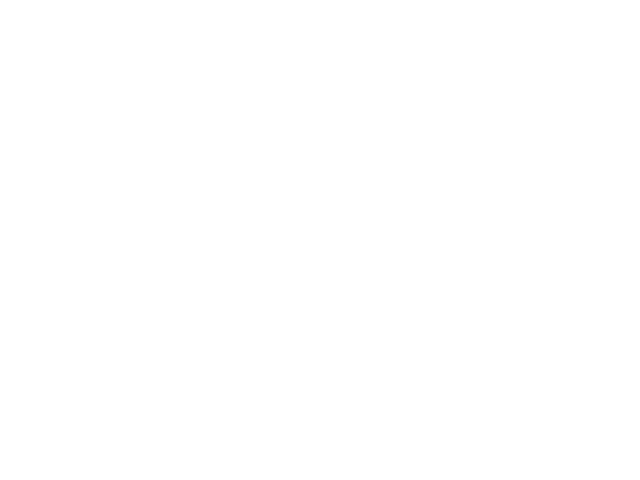

<IPython.core.display.Javascript object>


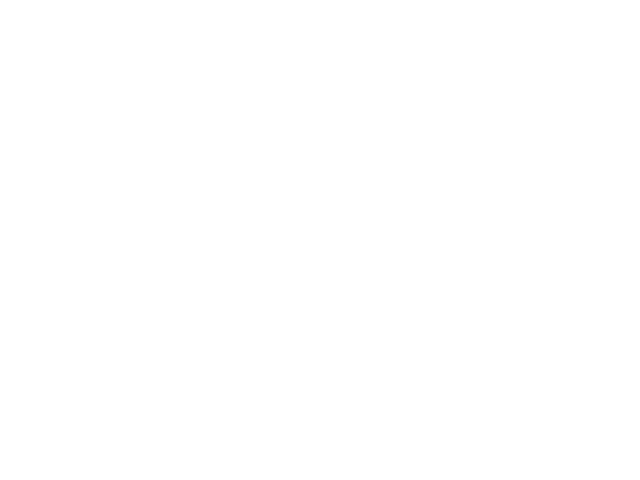

<IPython.core.display.Javascript object>


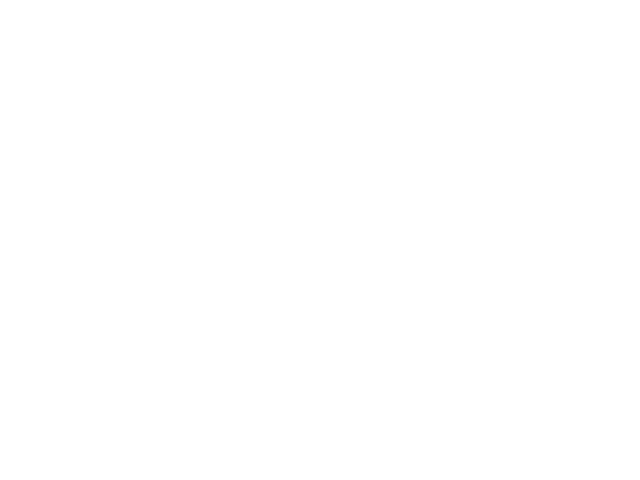

<IPython.core.display.Javascript object>


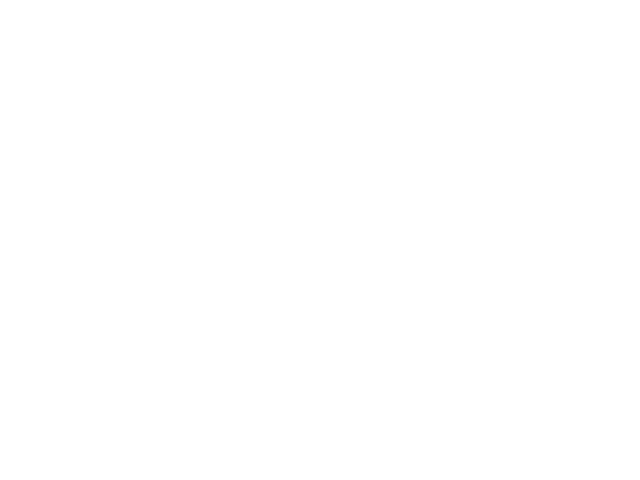

<IPython.core.display.Javascript object>


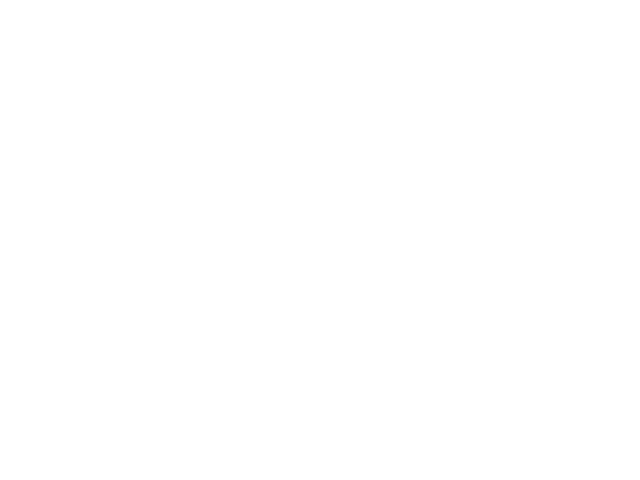

<IPython.core.display.Javascript object>


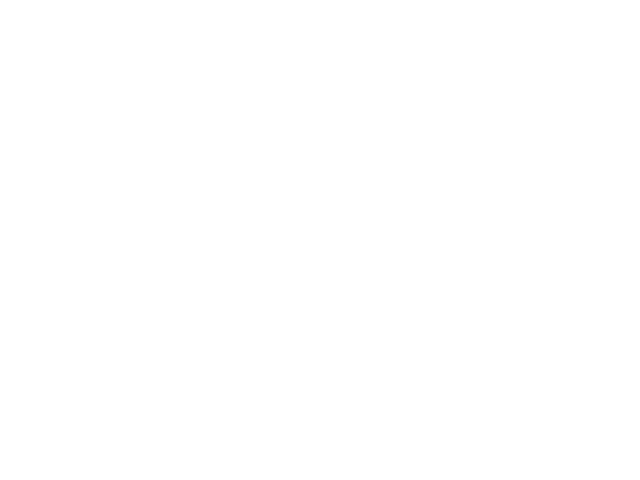

<IPython.core.display.Javascript object>


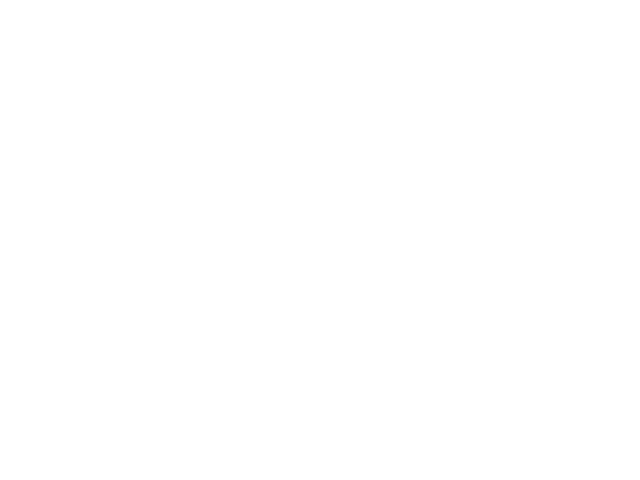

<IPython.core.display.Javascript object>


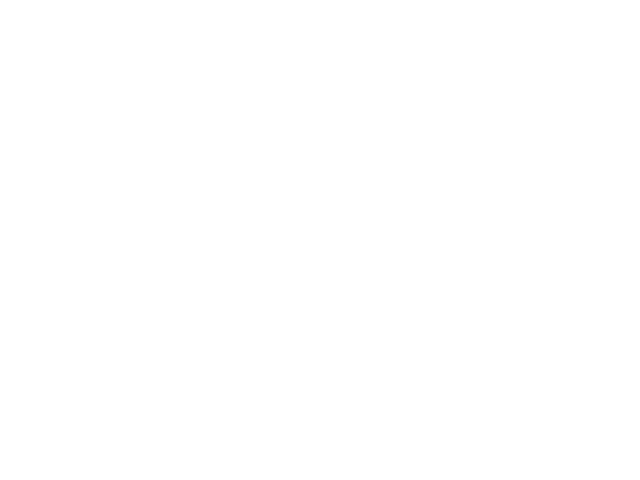

<IPython.core.display.Javascript object>


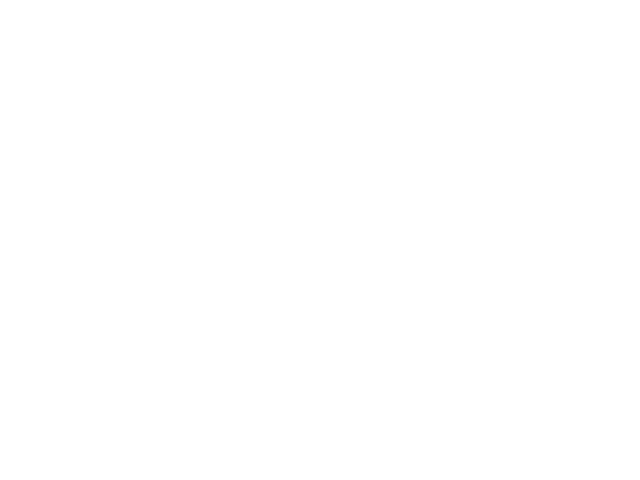

<IPython.core.display.Javascript object>


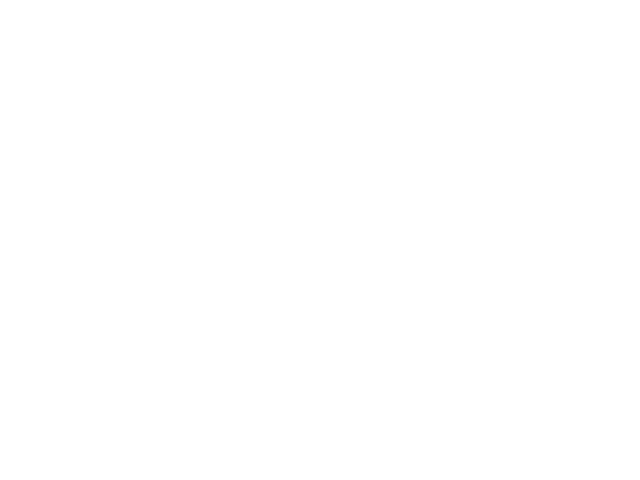

<IPython.core.display.Javascript object>


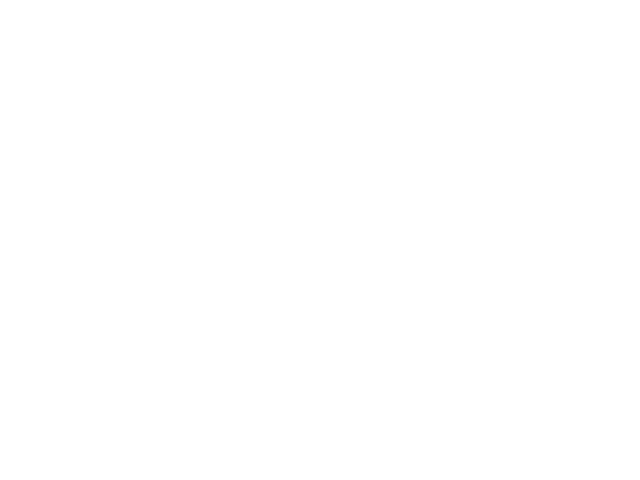

<IPython.core.display.Javascript object>


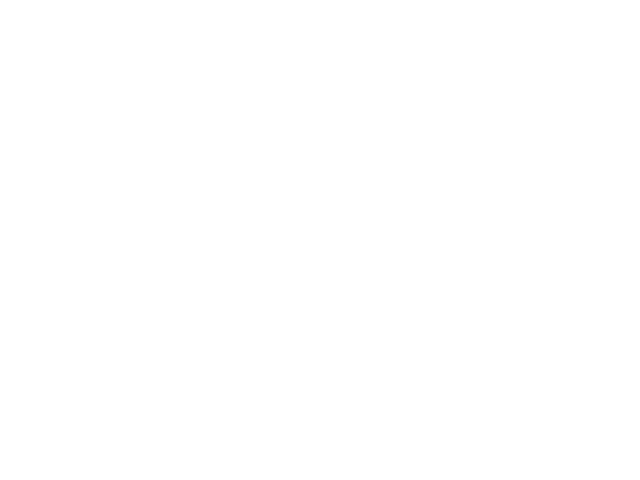

<IPython.core.display.Javascript object>


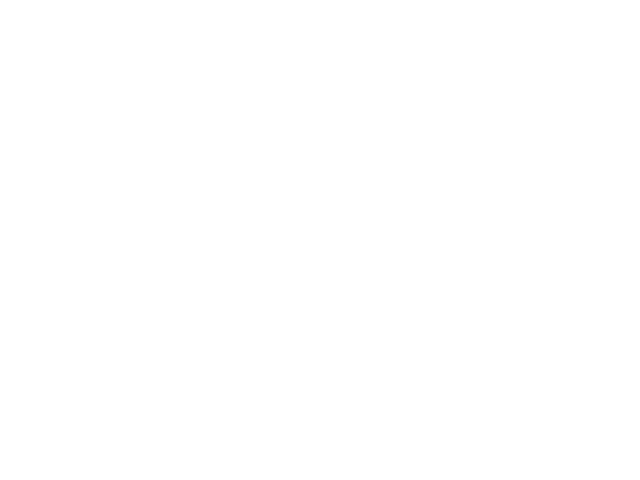

<IPython.core.display.Javascript object>


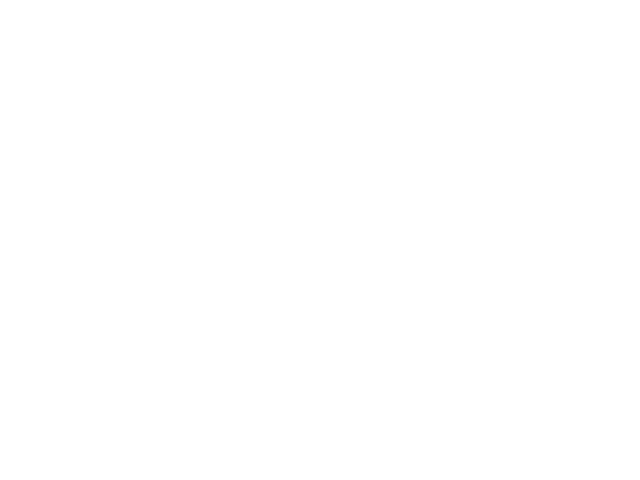

<IPython.core.display.Javascript object>


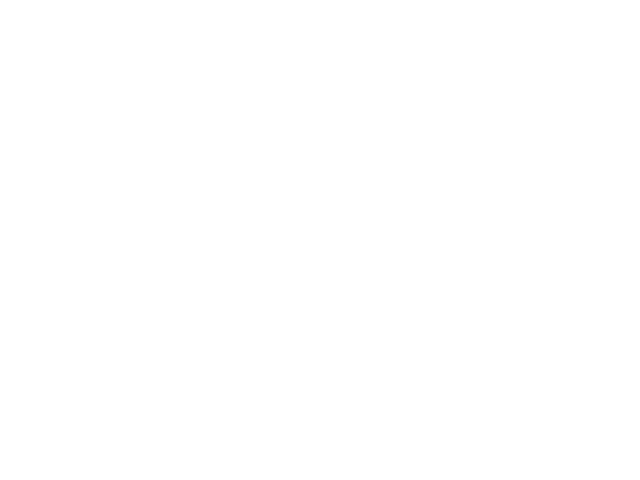

<IPython.core.display.Javascript object>


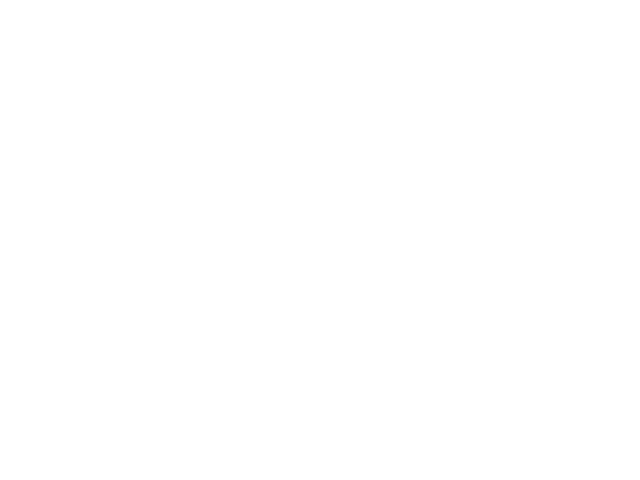

<IPython.core.display.Javascript object>


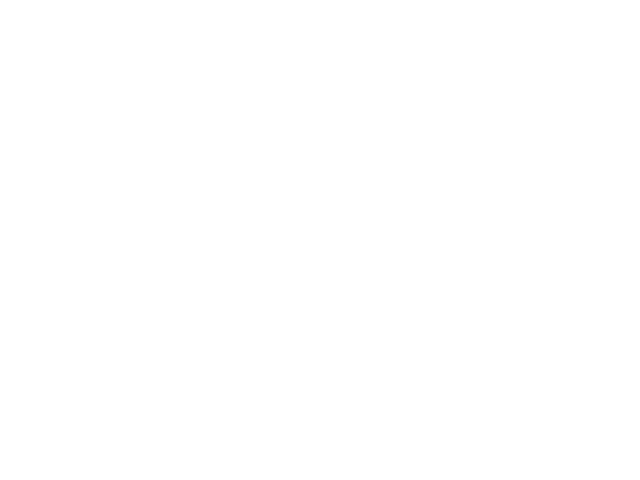

<IPython.core.display.Javascript object>


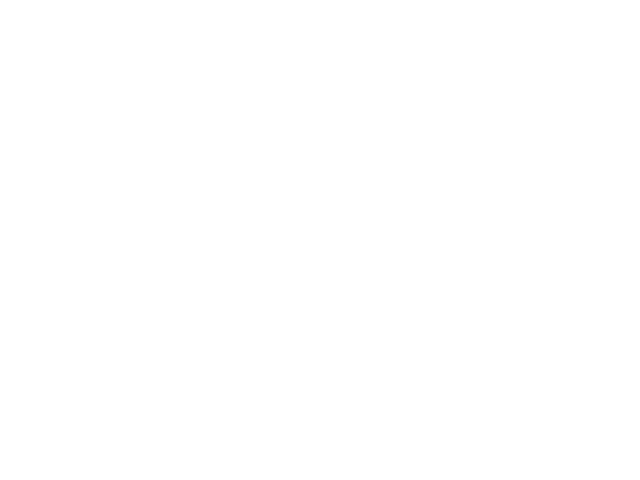

s72_131220_0001soligm


C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1280 1672 1939 2076 2125 2385 2723    0   -1]


<IPython.core.display.Javascript object>


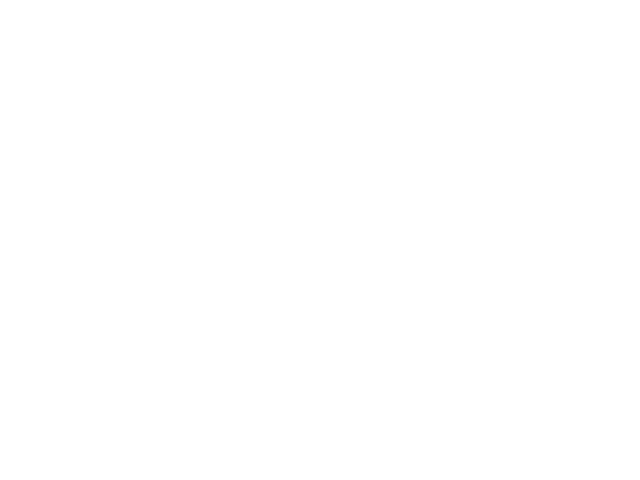

<IPython.core.display.Javascript object>


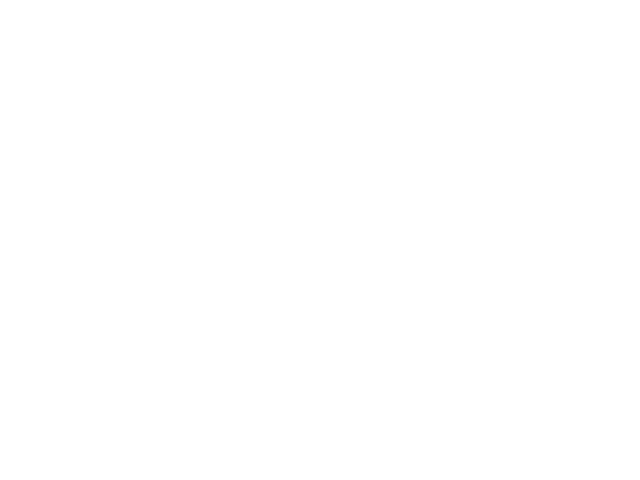

<IPython.core.display.Javascript object>


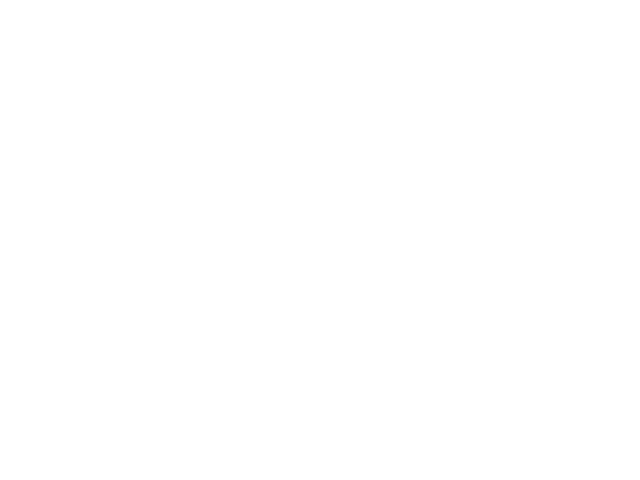

<IPython.core.display.Javascript object>


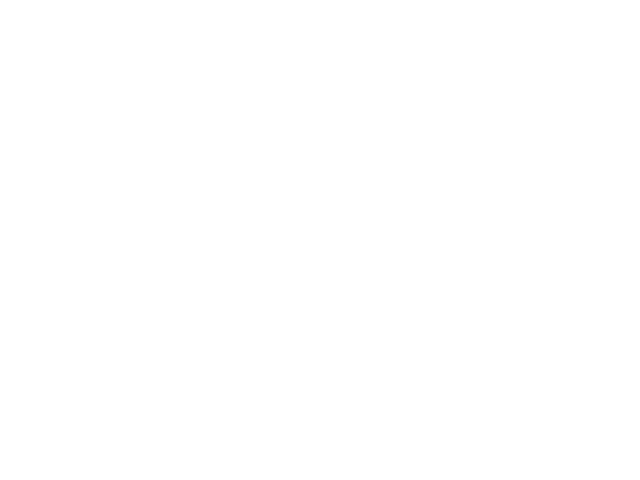

<IPython.core.display.Javascript object>


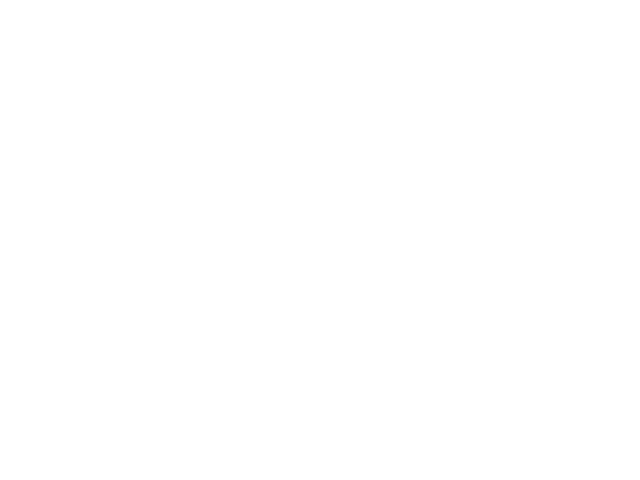

<IPython.core.display.Javascript object>


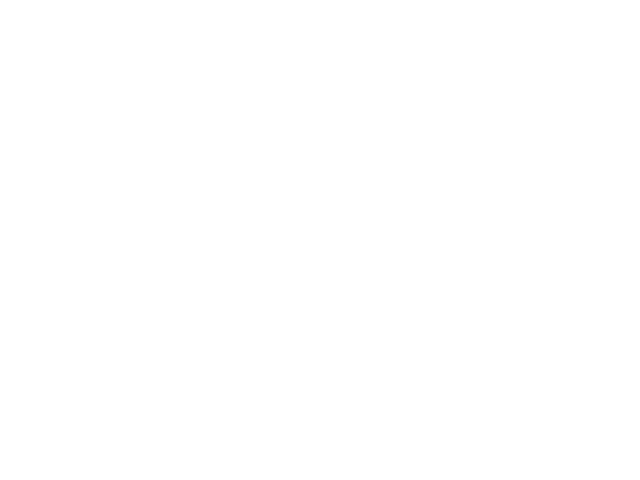

<IPython.core.display.Javascript object>


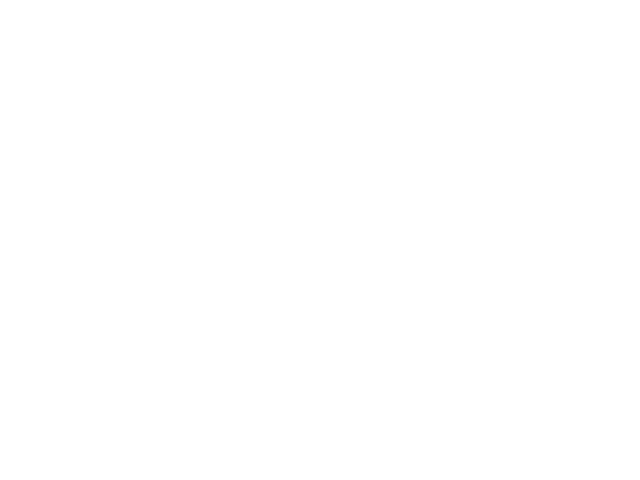

<IPython.core.display.Javascript object>


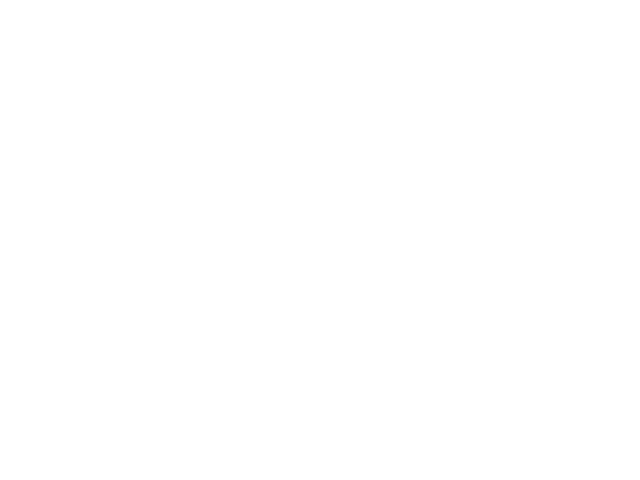

<IPython.core.display.Javascript object>


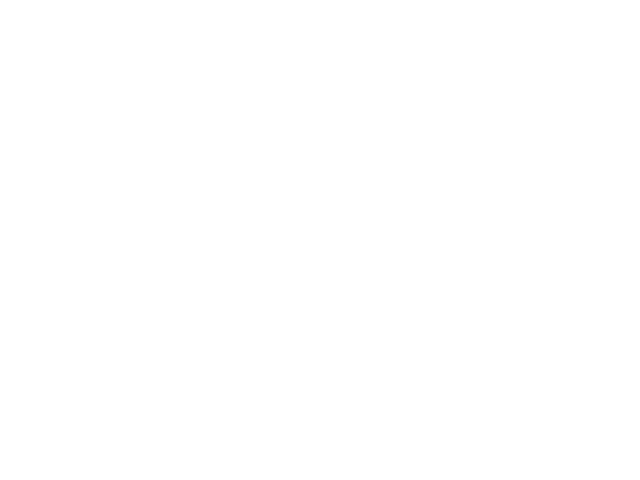

<IPython.core.display.Javascript object>


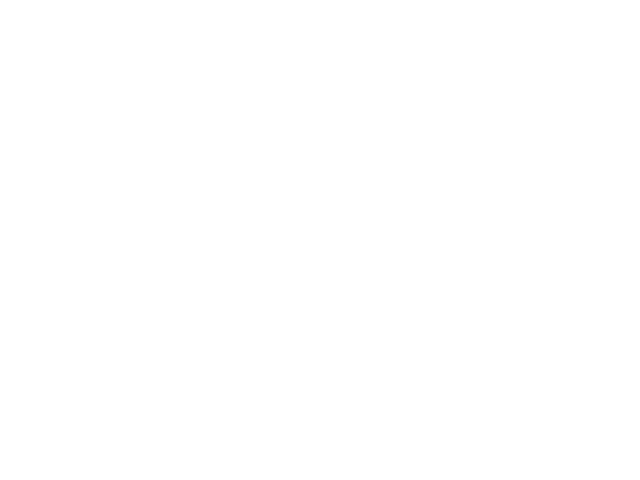

<IPython.core.display.Javascript object>


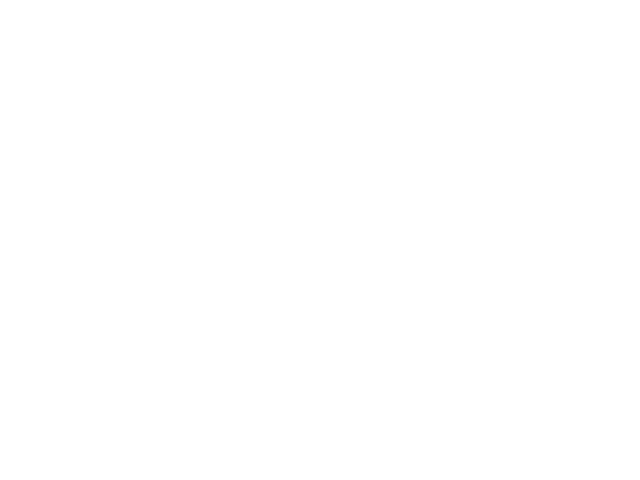

<IPython.core.display.Javascript object>


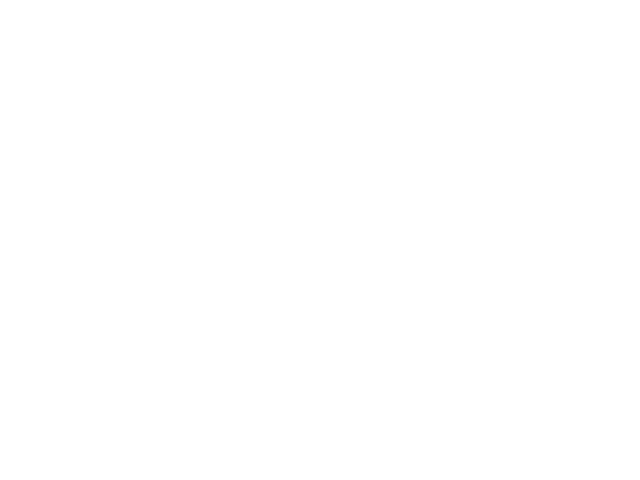

<IPython.core.display.Javascript object>


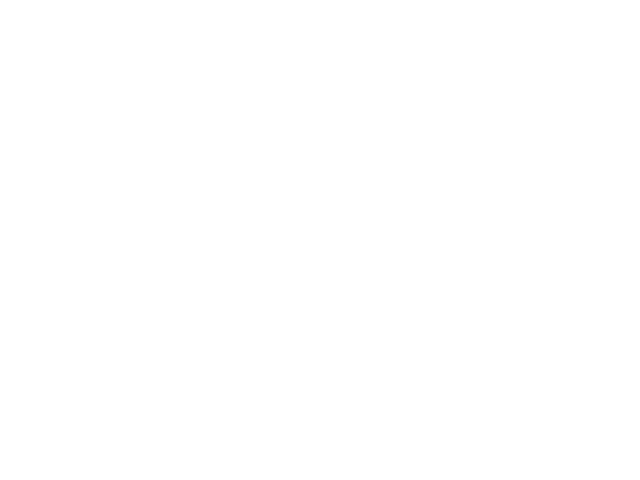

<IPython.core.display.Javascript object>


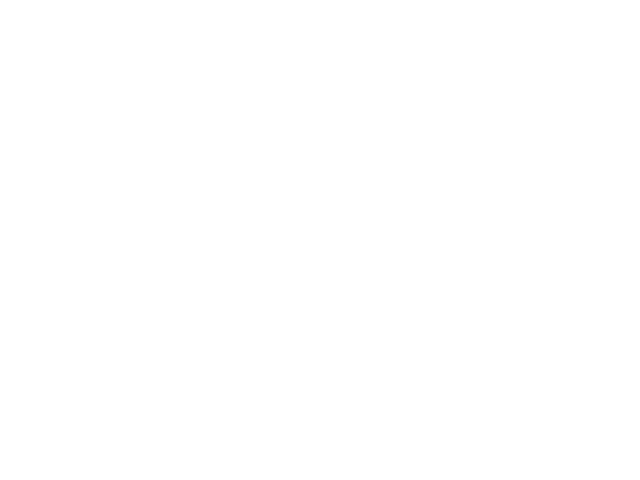

<IPython.core.display.Javascript object>


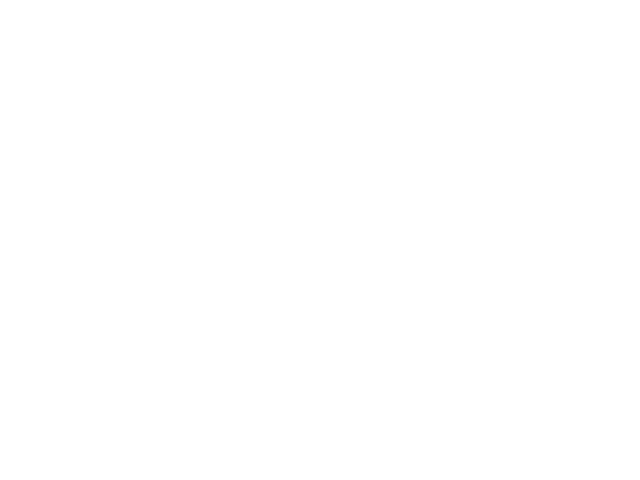

<IPython.core.display.Javascript object>


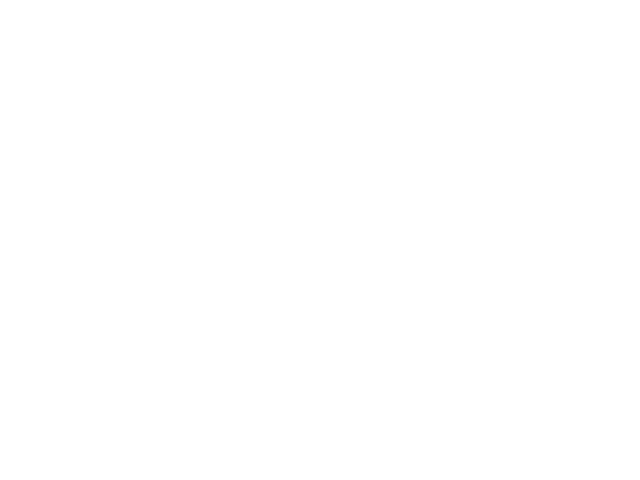

<IPython.core.display.Javascript object>


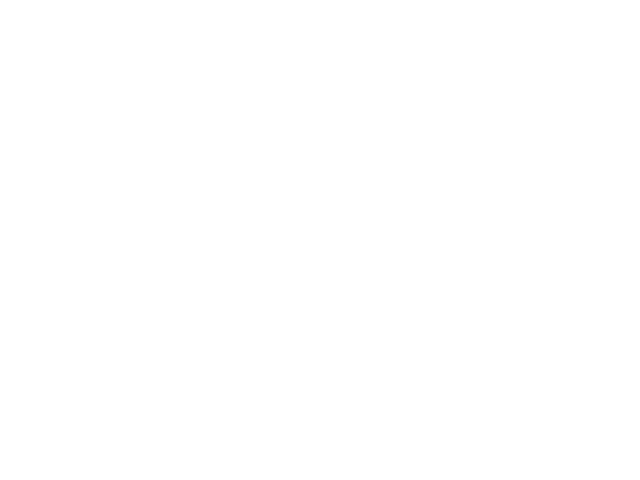

<IPython.core.display.Javascript object>


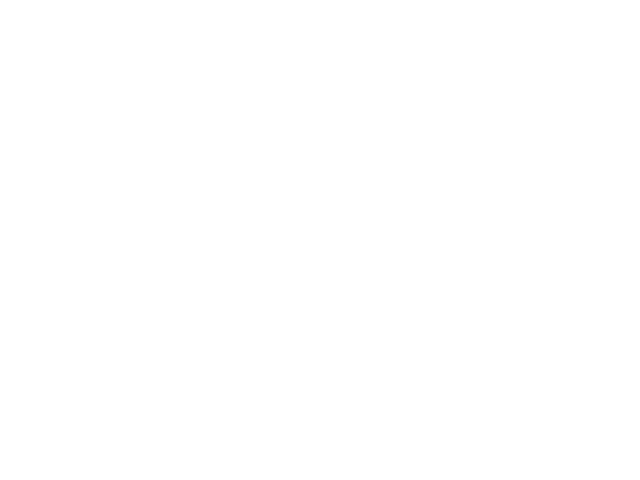

s72_121220_0003soligm


C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1306 1719 2010 2150 2201 2391 2761 2852 2865 2973    0   -1]


<IPython.core.display.Javascript object>


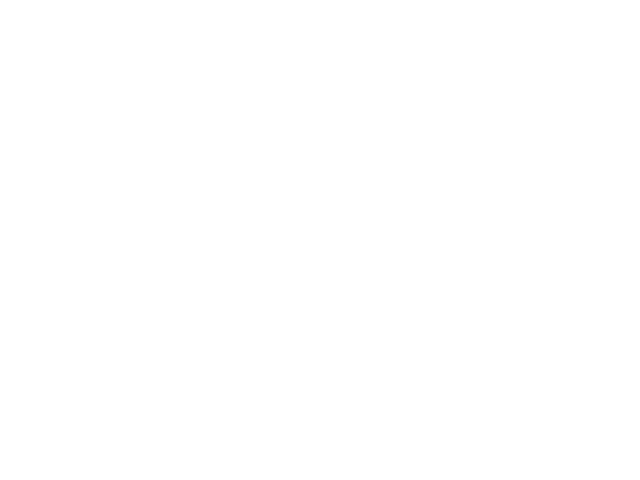

<IPython.core.display.Javascript object>


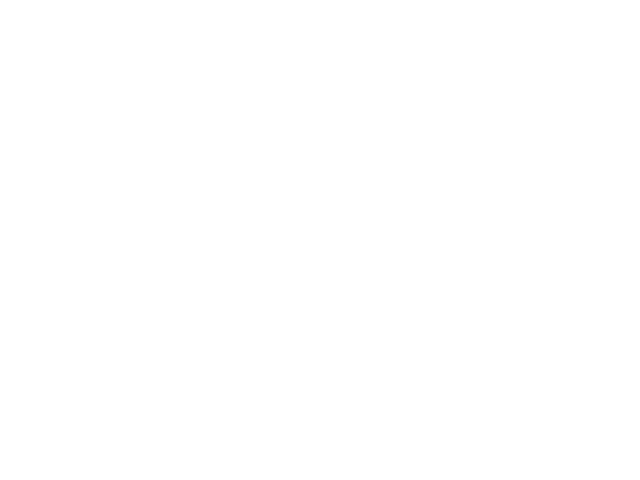

<IPython.core.display.Javascript object>


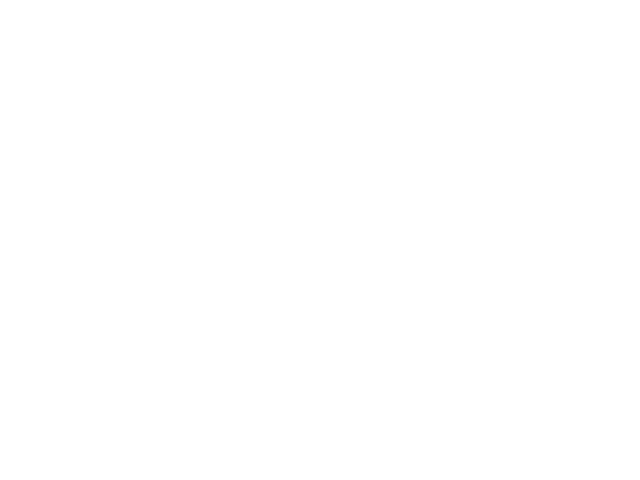

<IPython.core.display.Javascript object>


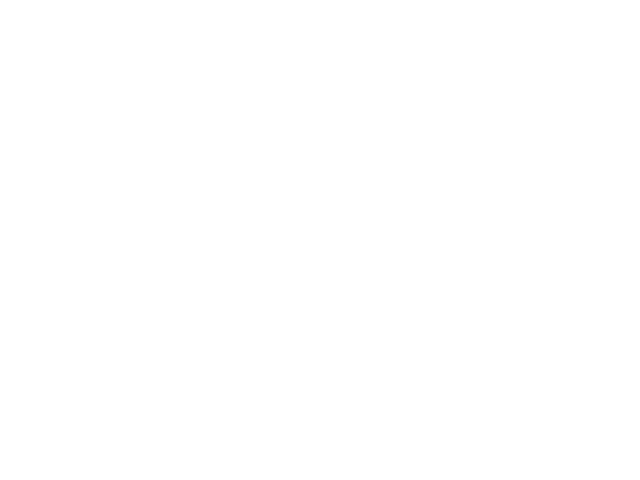

<IPython.core.display.Javascript object>


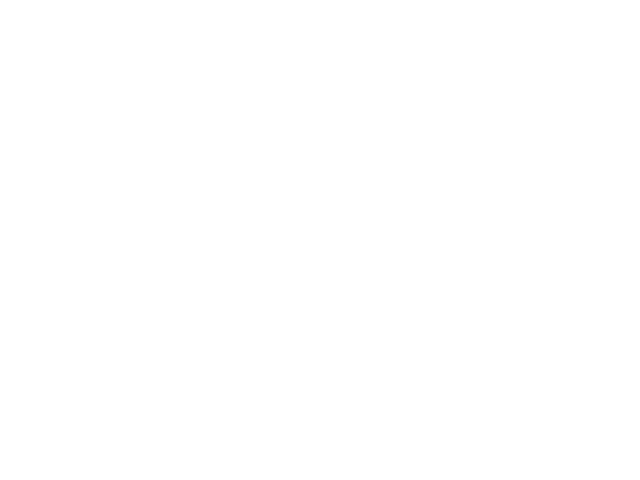

<IPython.core.display.Javascript object>


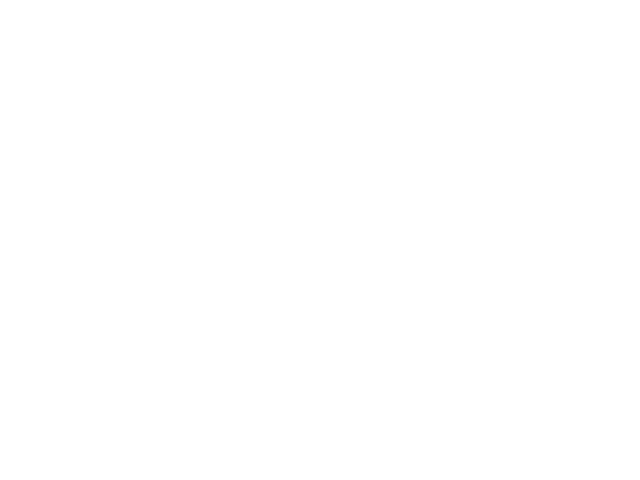

<IPython.core.display.Javascript object>


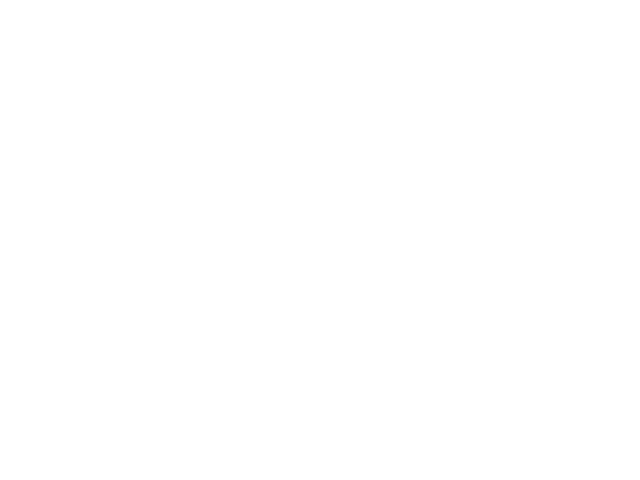

<IPython.core.display.Javascript object>


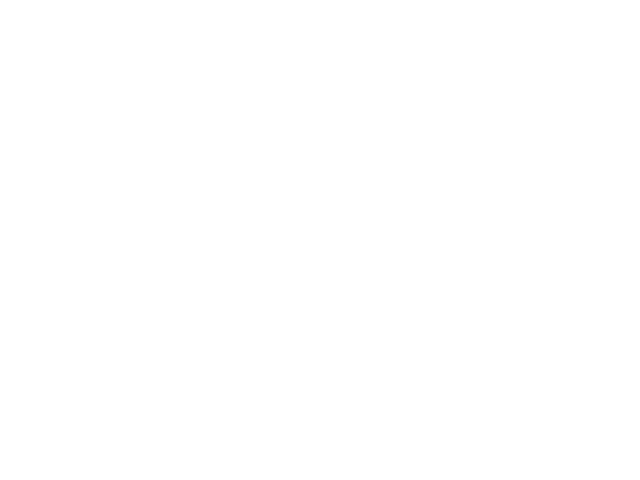

<IPython.core.display.Javascript object>


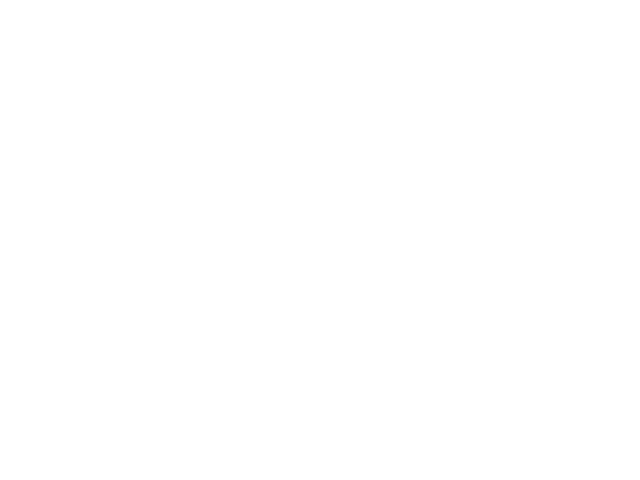

<IPython.core.display.Javascript object>


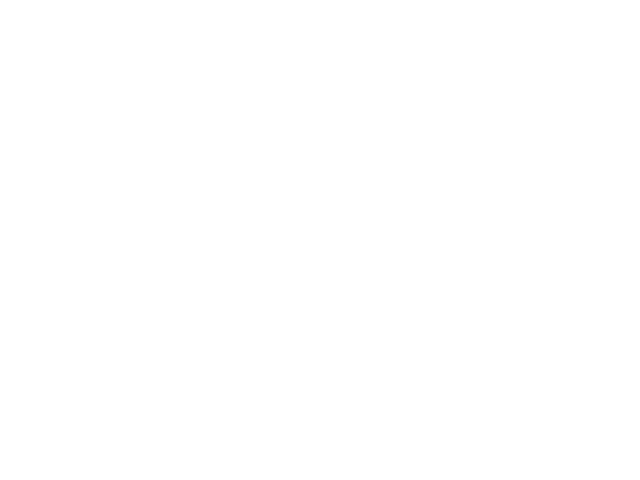

<IPython.core.display.Javascript object>


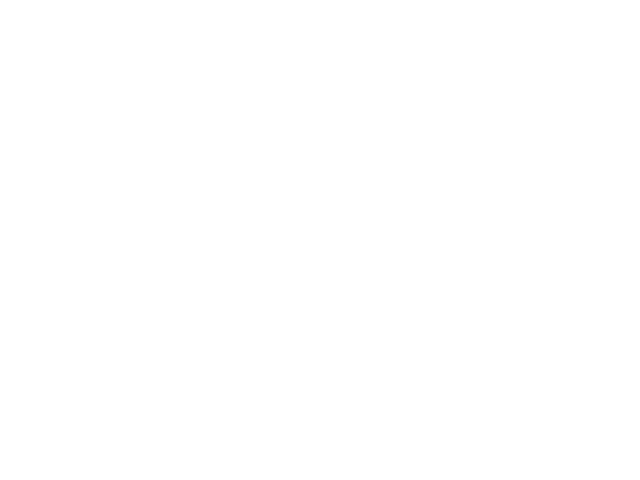

<IPython.core.display.Javascript object>


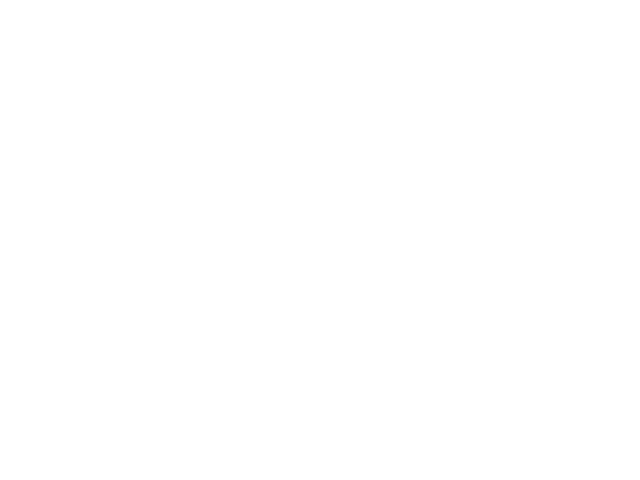

<IPython.core.display.Javascript object>


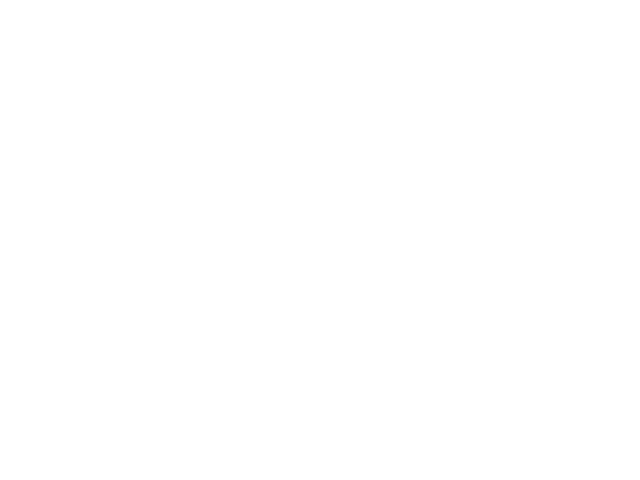

<IPython.core.display.Javascript object>


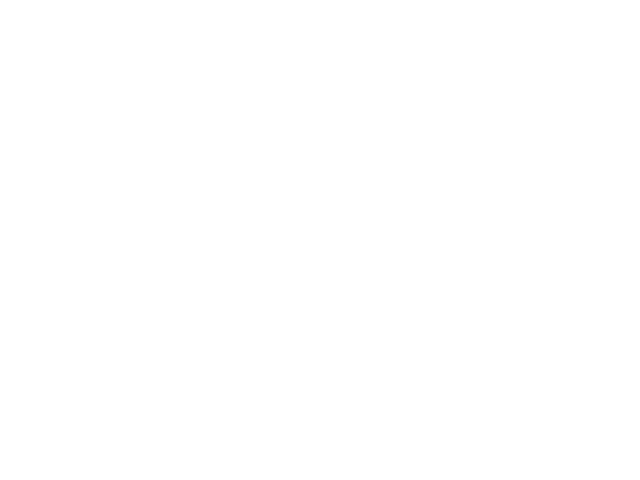

<IPython.core.display.Javascript object>


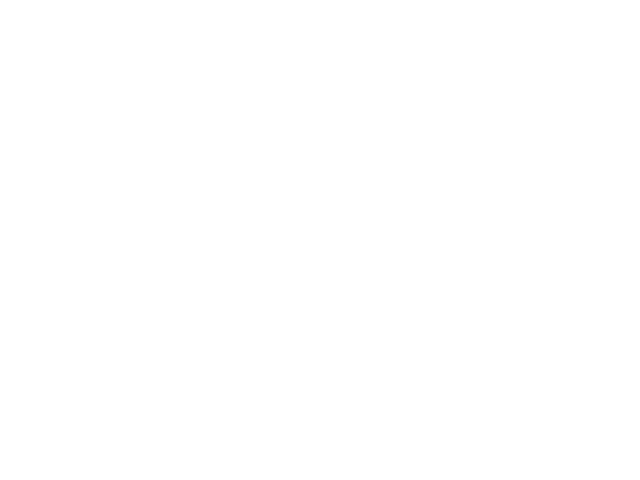

<IPython.core.display.Javascript object>


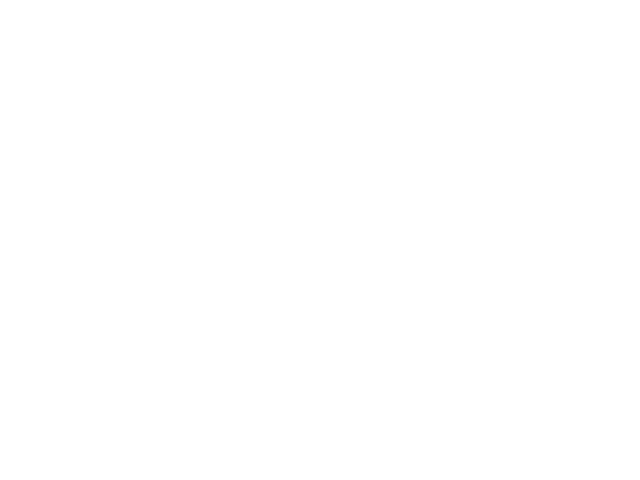

<IPython.core.display.Javascript object>


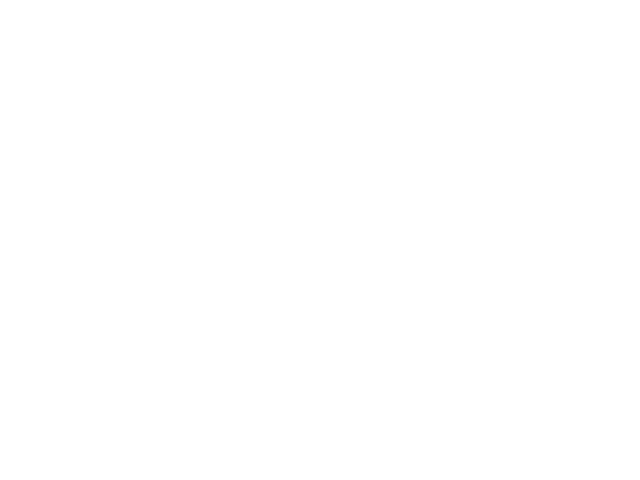

<IPython.core.display.Javascript object>


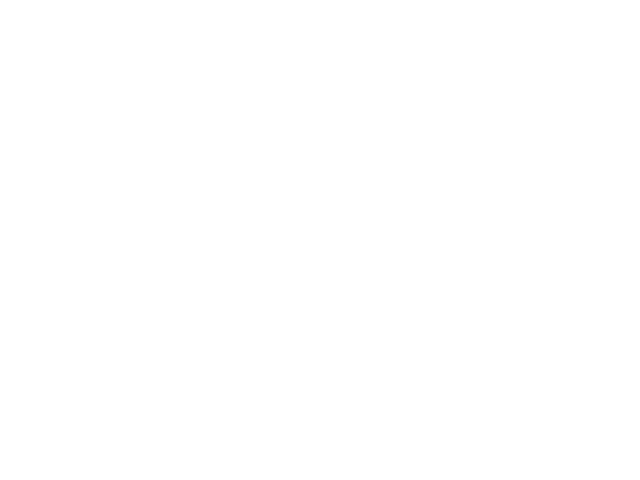

<IPython.core.display.Javascript object>


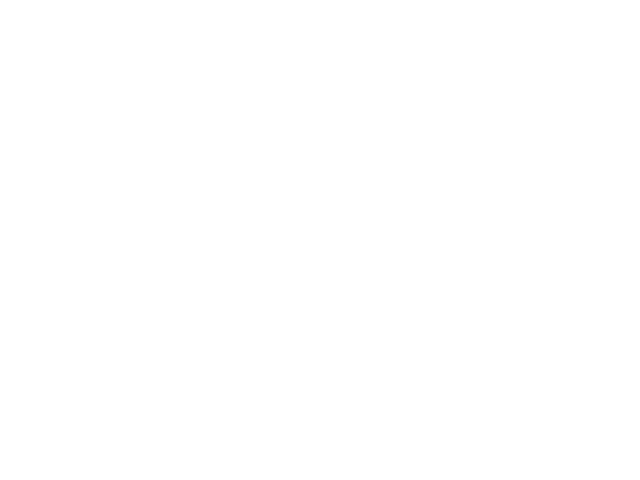

<IPython.core.display.Javascript object>


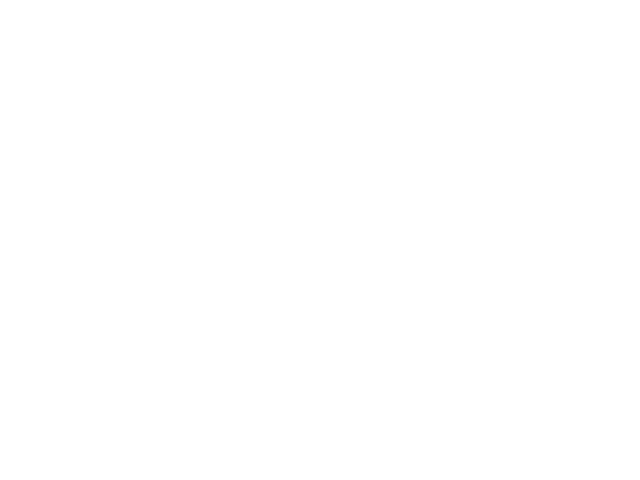

<IPython.core.display.Javascript object>


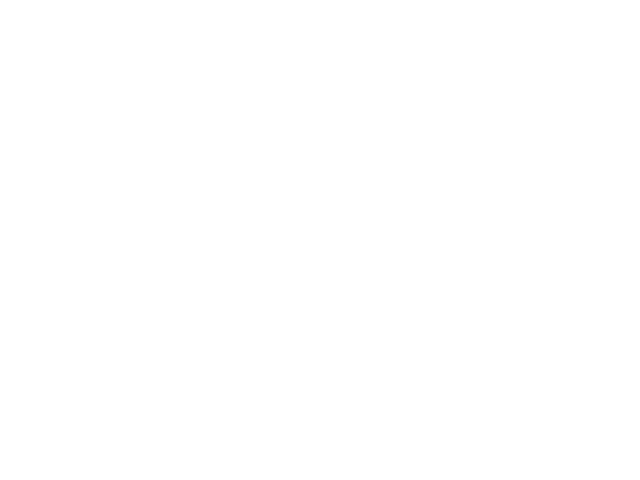

<IPython.core.display.Javascript object>


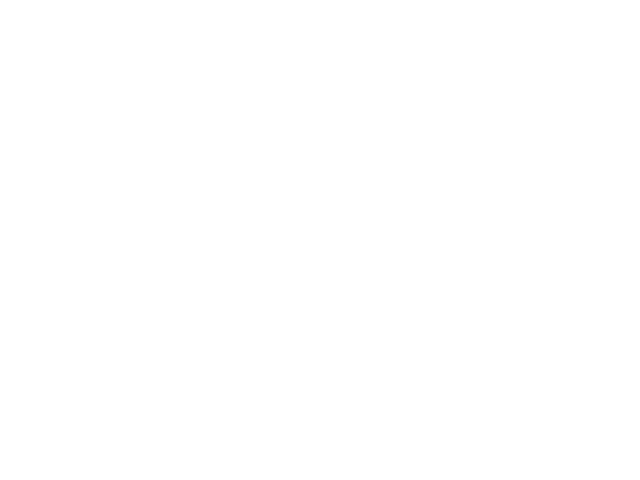

<IPython.core.display.Javascript object>


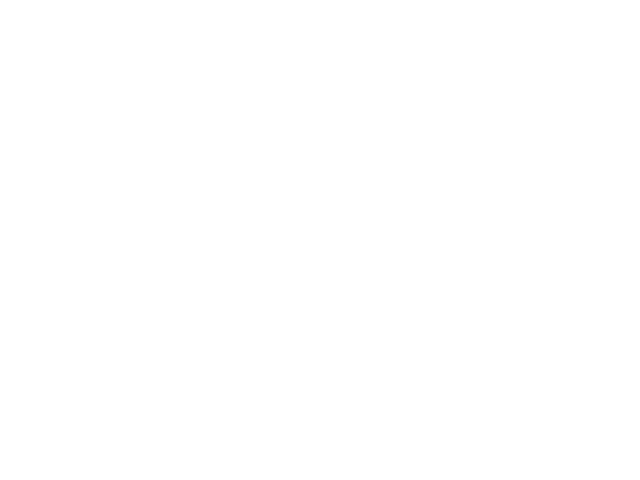

<IPython.core.display.Javascript object>


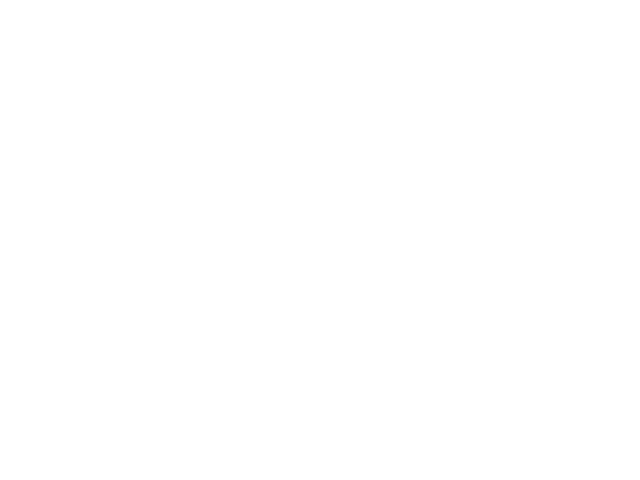

s72_131220_0002soligm


C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1331 1768 2094 2246 2310 2547 2958    0   -1]


<IPython.core.display.Javascript object>


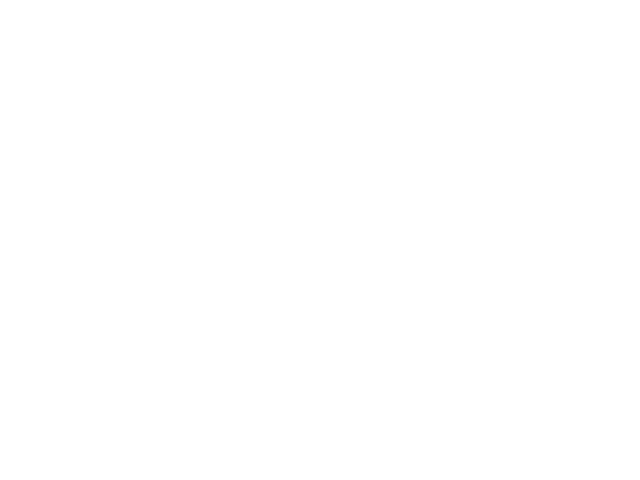

<IPython.core.display.Javascript object>


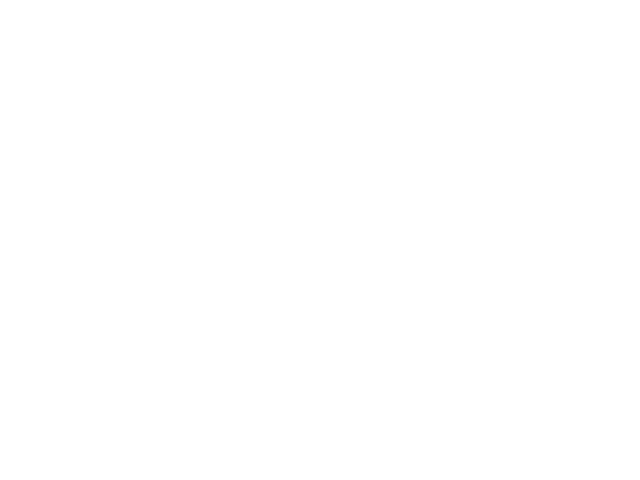

<IPython.core.display.Javascript object>


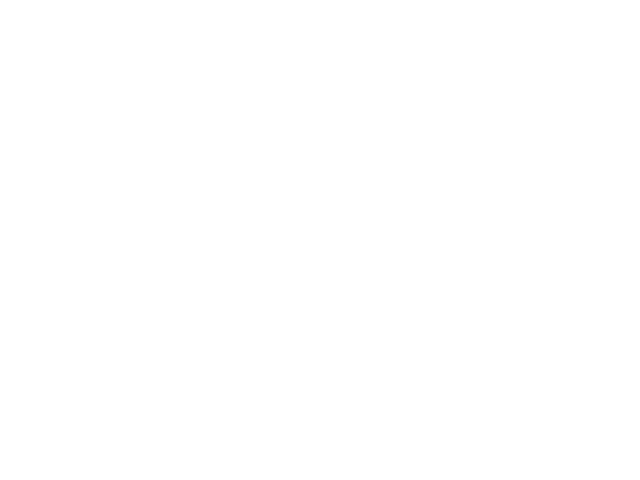

<IPython.core.display.Javascript object>


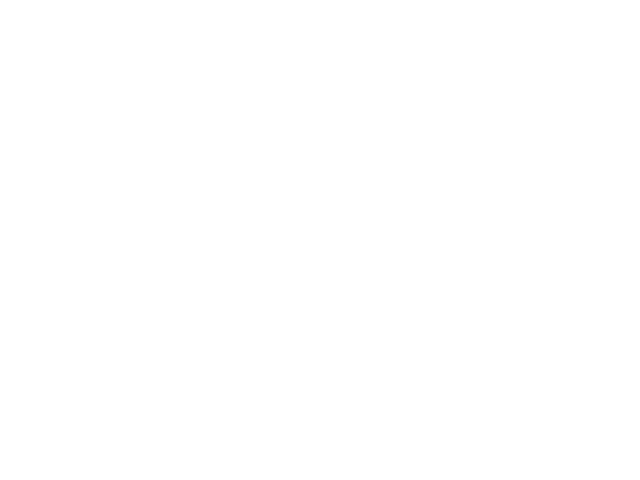

<IPython.core.display.Javascript object>


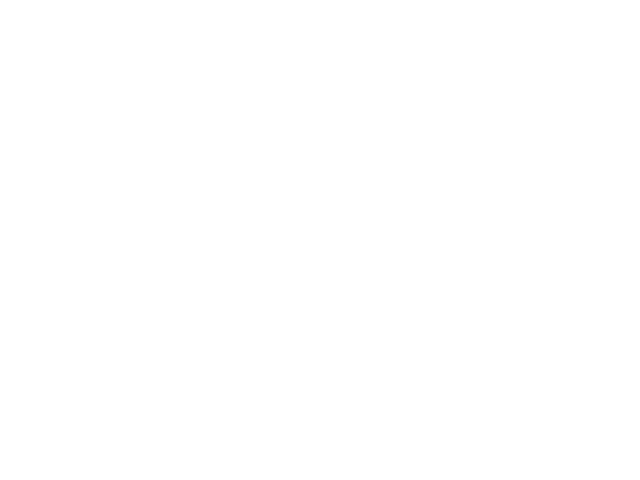

<IPython.core.display.Javascript object>


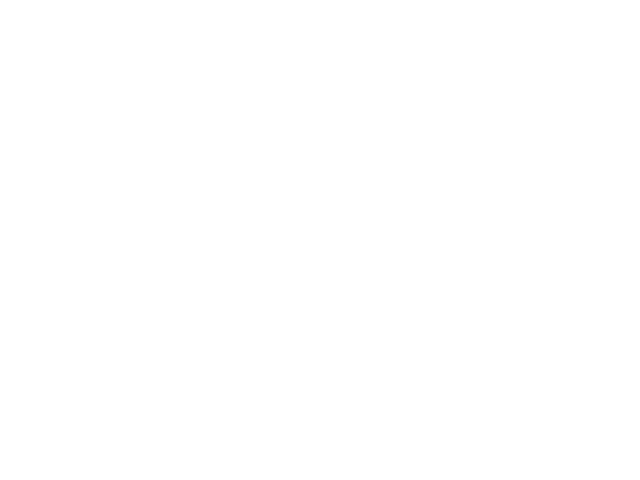

<IPython.core.display.Javascript object>


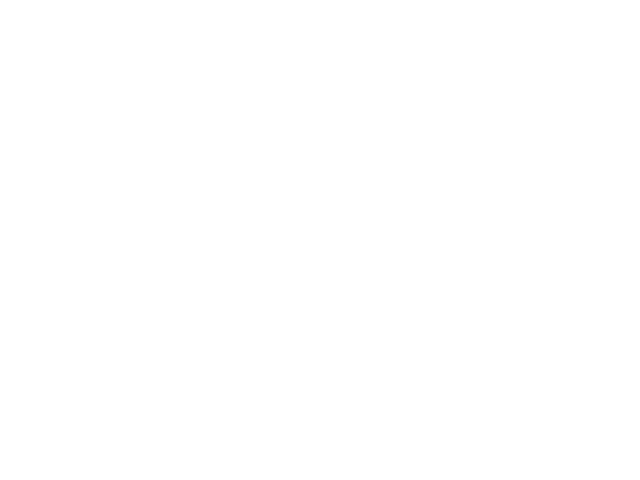

<IPython.core.display.Javascript object>


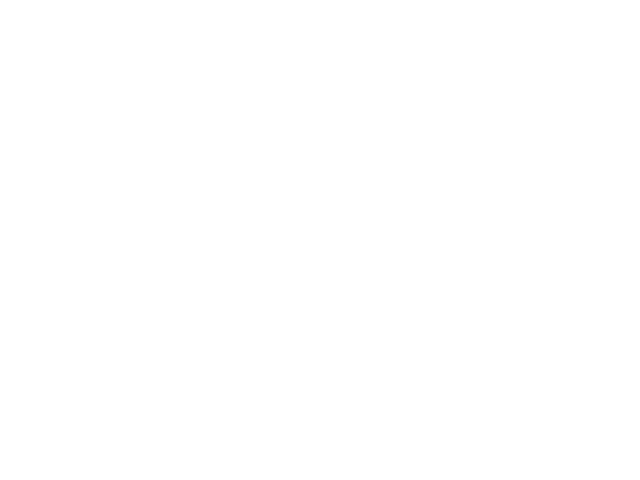

<IPython.core.display.Javascript object>


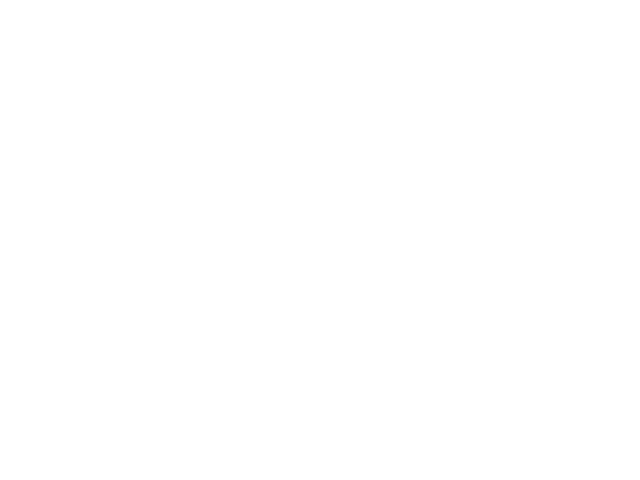

<IPython.core.display.Javascript object>


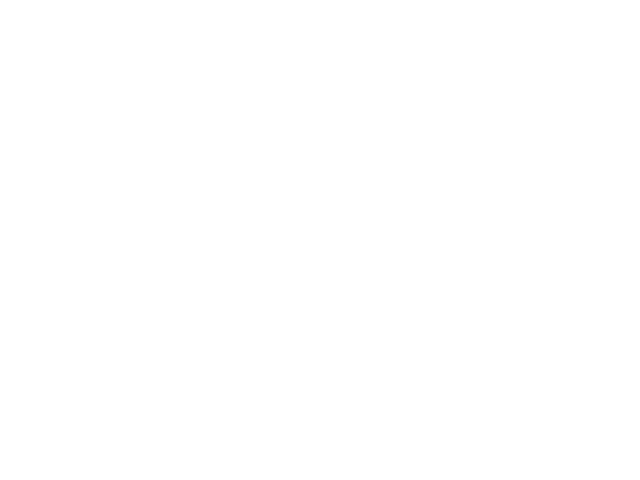

<IPython.core.display.Javascript object>


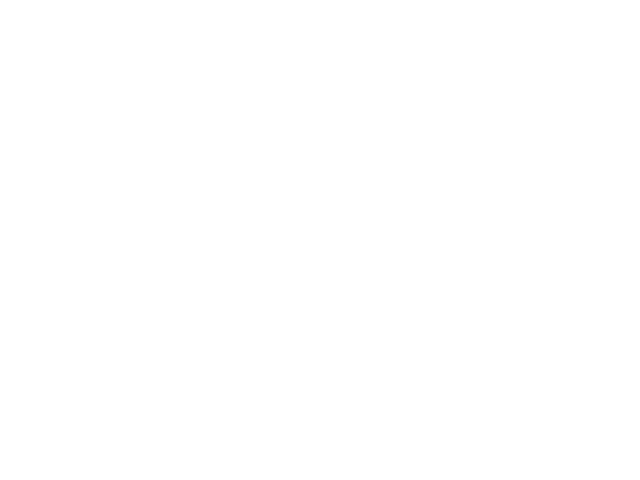

<IPython.core.display.Javascript object>


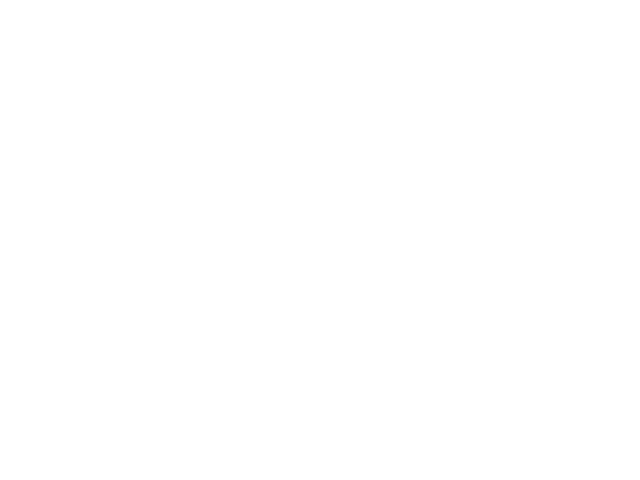

<IPython.core.display.Javascript object>


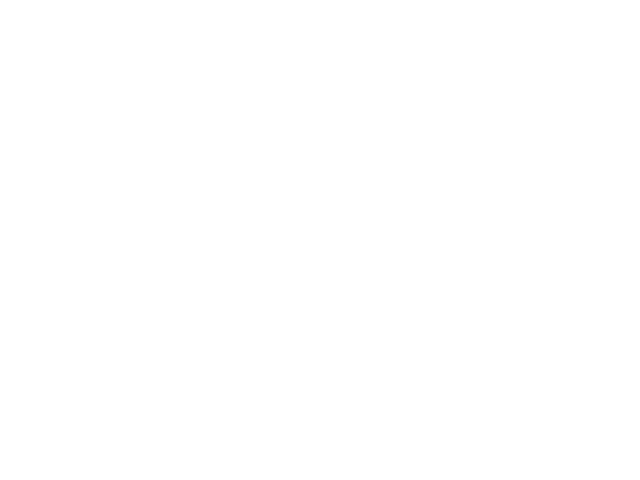

<IPython.core.display.Javascript object>


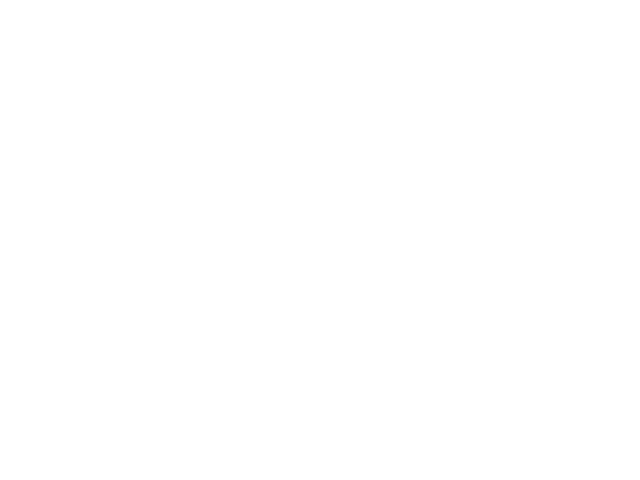

<IPython.core.display.Javascript object>


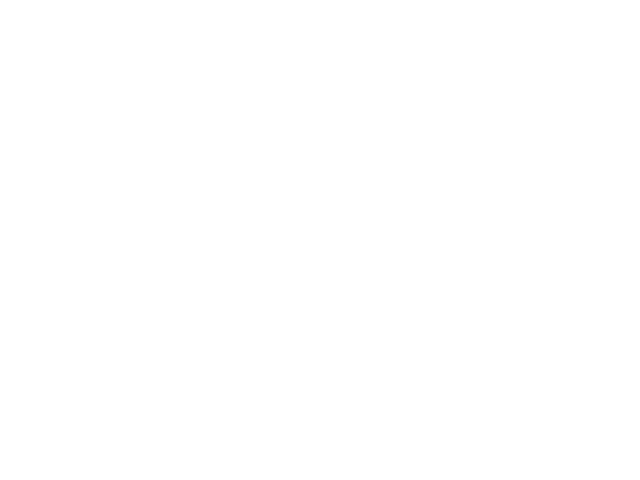

<IPython.core.display.Javascript object>


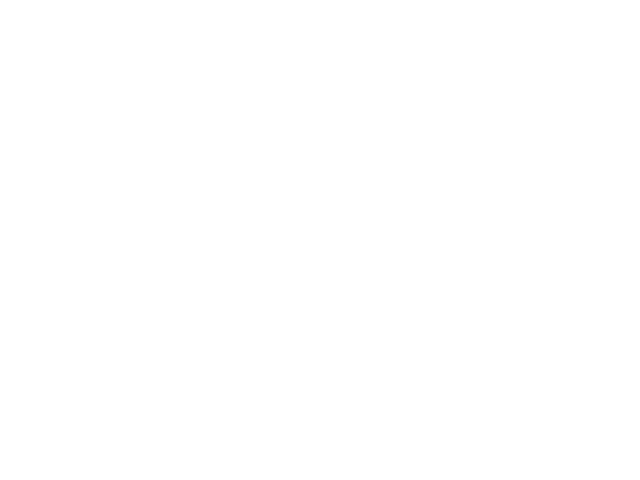

<IPython.core.display.Javascript object>


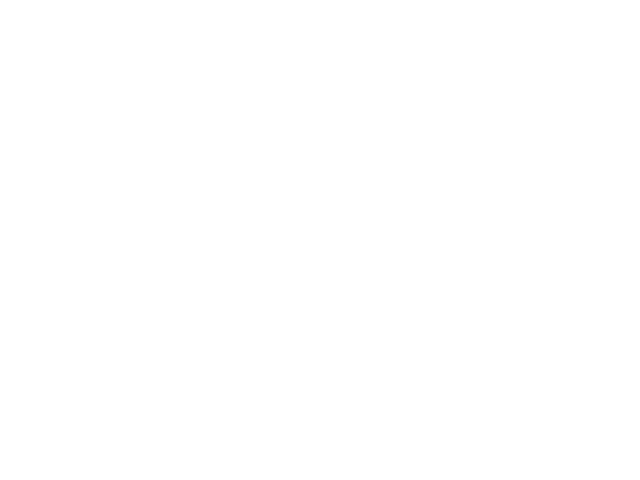

<IPython.core.display.Javascript object>


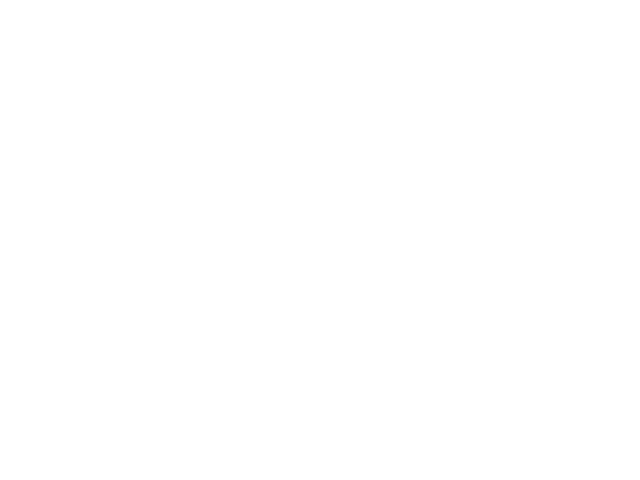

s72_131220_0003soligm


C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1362 1827 2193 2354 2419 2667    0   -1]


<IPython.core.display.Javascript object>


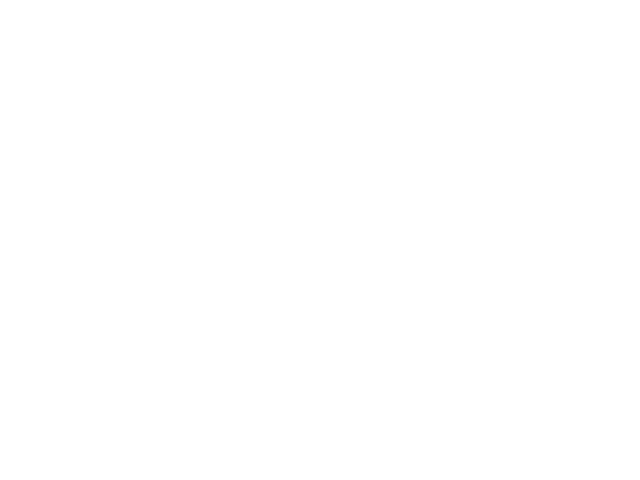

<IPython.core.display.Javascript object>


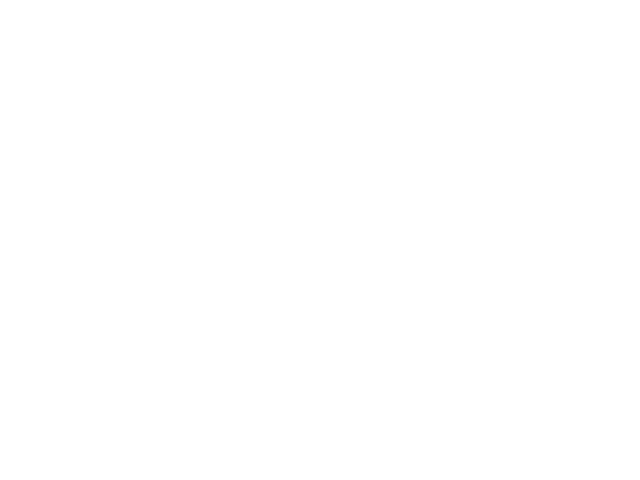

<IPython.core.display.Javascript object>


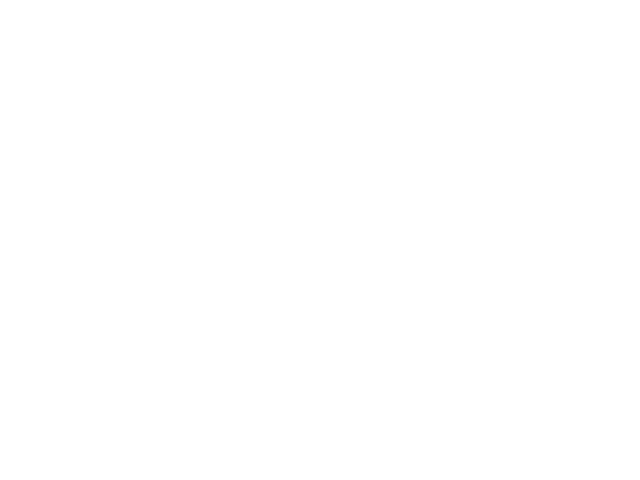

<IPython.core.display.Javascript object>


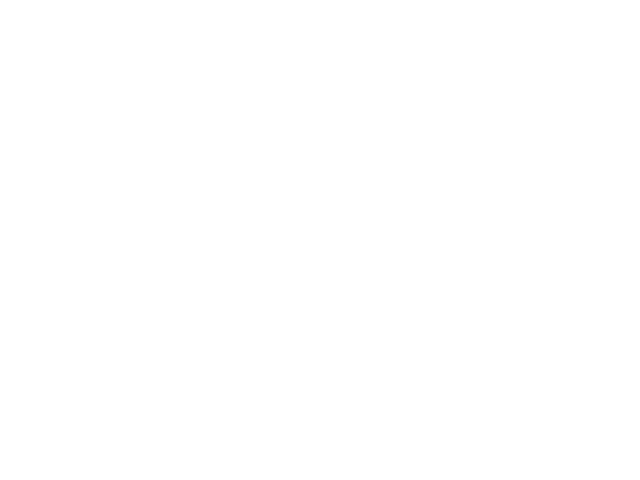

<IPython.core.display.Javascript object>


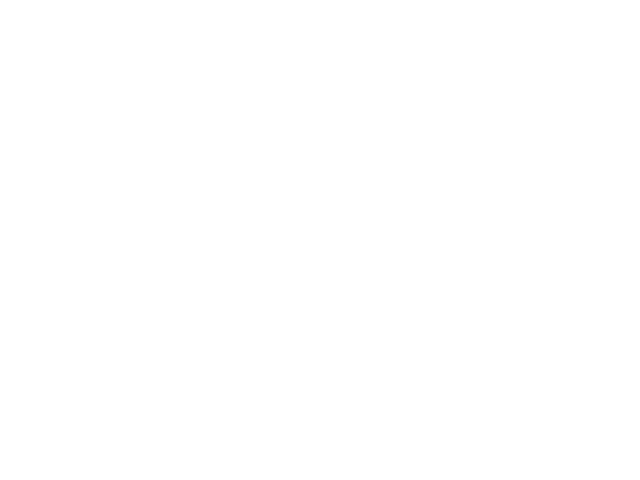

<IPython.core.display.Javascript object>


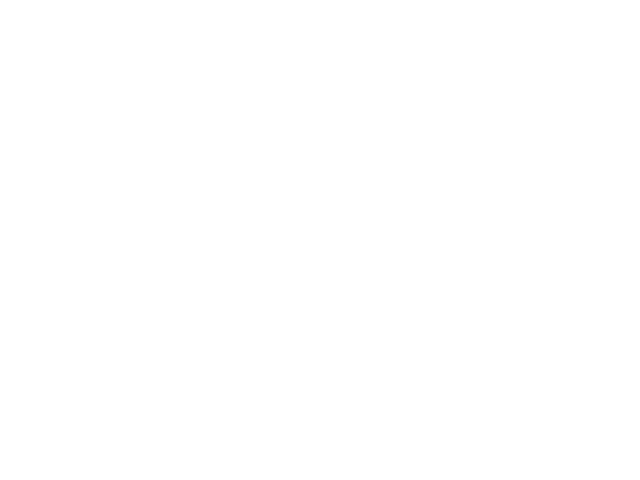

<IPython.core.display.Javascript object>


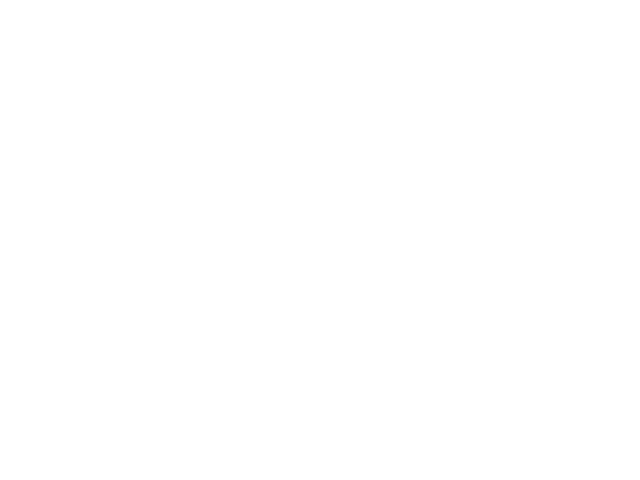

<IPython.core.display.Javascript object>


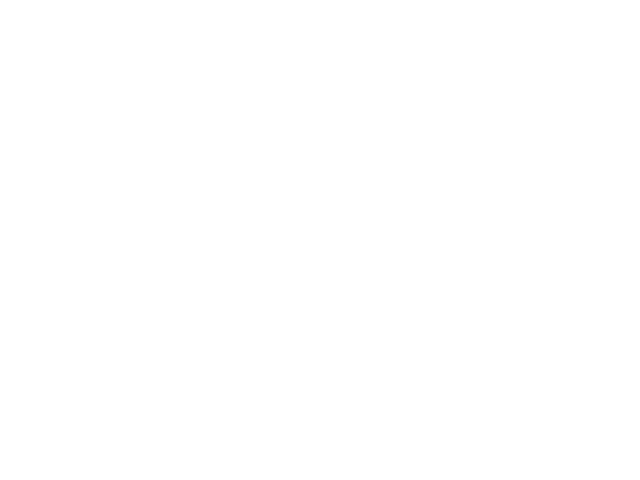

<IPython.core.display.Javascript object>


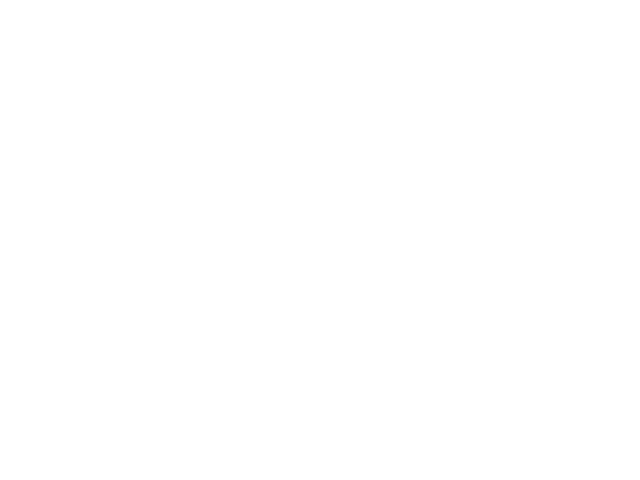

<IPython.core.display.Javascript object>


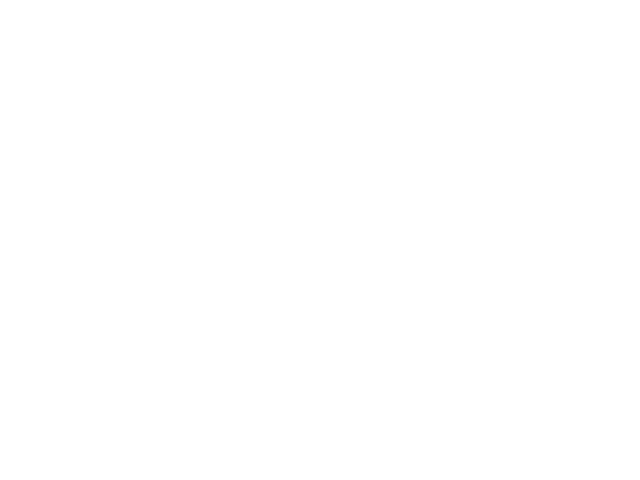

<IPython.core.display.Javascript object>


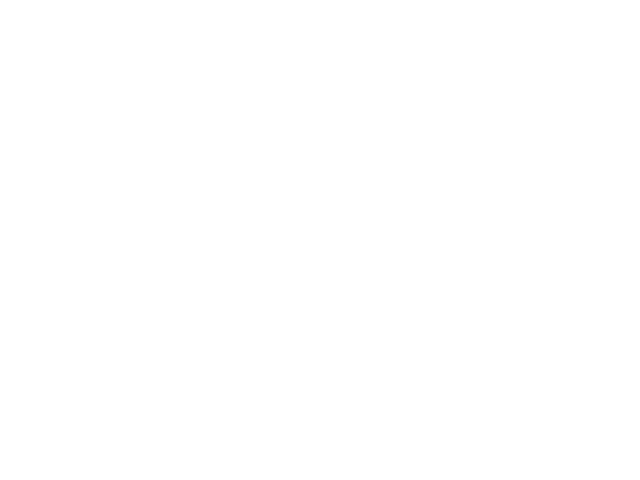

<IPython.core.display.Javascript object>


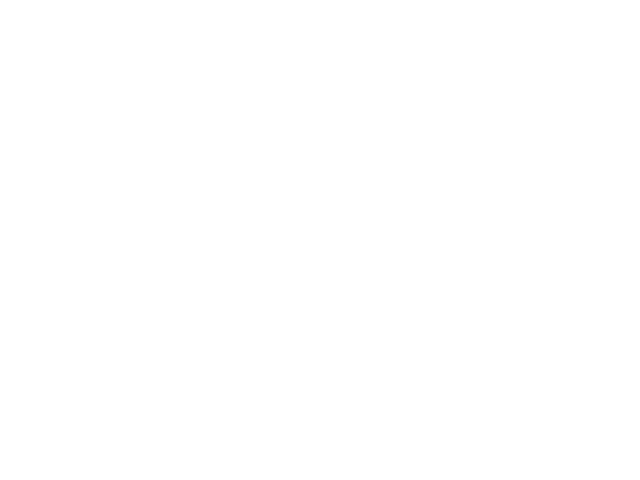

<IPython.core.display.Javascript object>


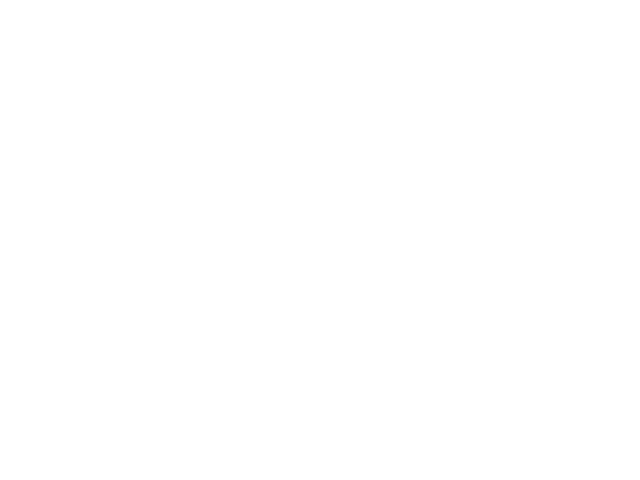

<IPython.core.display.Javascript object>


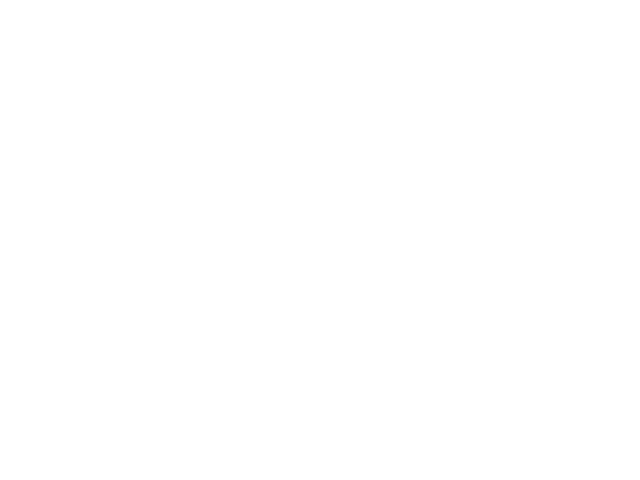

<IPython.core.display.Javascript object>


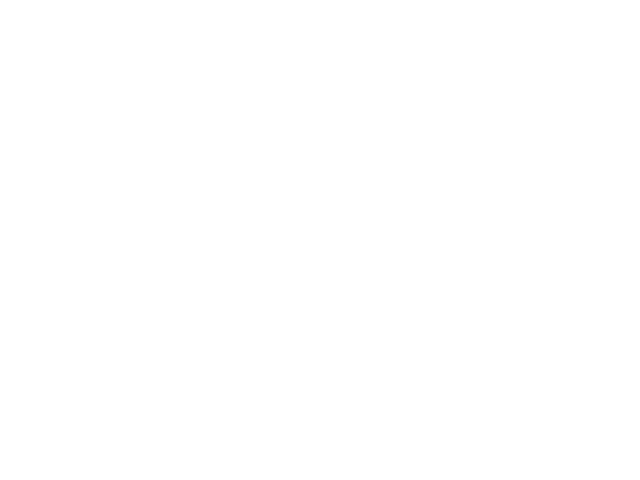

<IPython.core.display.Javascript object>


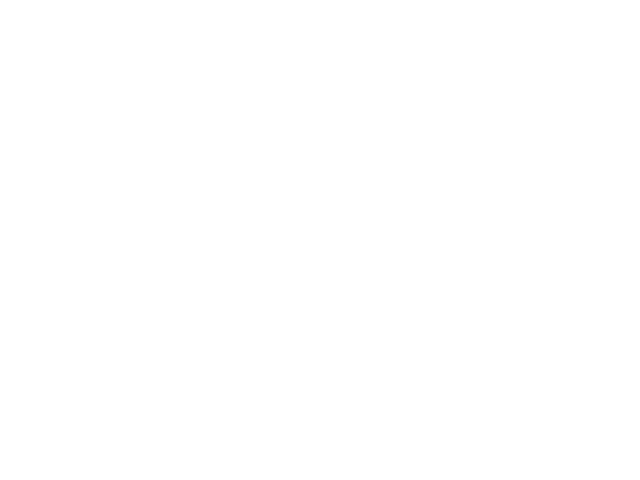

In [7]:
runs = ['s72_121220_0001soligm', 's72_111220_0010soligm', 's72_121220_0005soligm', 's72_121220_0004soligm', 
        's72_131220_0001soligm', 's72_121220_0003soligm', 's72_131220_0002soligm', 's72_131220_0003soligm']

for run_id in runs:
    
    print(run_id)

    OUTPUT_SUBDIR = OUTPUT_DIR + run_id + '\\'
    OUTPUT_HIST_SUBDIR = OUTPUT_SUBDIR + 'solar_histograms\\'
    OUTPUT_HIST_SUBSUBDIR = OUTPUT_HIST_SUBDIR + run_id + '_used_histograms\\'

    if not os.path.exists(OUTPUT_SUBDIR):
        os.makedirs(OUTPUT_SUBDIR, exist_ok=True)
        
    if not os.path.exists(OUTPUT_HIST_SUBDIR):
        os.makedirs(OUTPUT_HIST_SUBDIR, exist_ok=True)
        
    if not os.path.exists(OUTPUT_HIST_SUBSUBDIR):
        os.makedirs(OUTPUT_HIST_SUBSUBDIR, exist_ok=True)

    df_run = pd.read_csv(LOGS_DIR + run_id + '_merger_logs.csv')

    df_sliced = df_run[:3002]
    
    time_list = [time for time in df_sliced['time (Myr)']]
    
    sep, mw_common, m31_common = galaxy_com_separation(df_sliced)
    der = np.diff(sep)/np.diff(time_list)
    y0 = [0 for i in range(len(time_list[:-1]))]
    idx_list = np.argwhere(np.diff(np.sign(der - y0))).flatten()
    #time_hist = [time_list[i] for i in idx]
    idx_list = np.append(idx_list, 0)
    idx_list = np.append(idx_list, -1)
    print(idx_list)
    
    #for time in time_hist:
    for i in idx_list:
        mw_radii, common_radii = solar_system_distances(df_sliced, time_index=i)
        
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        
        mw_r_std = np.std(mw_radii)
        mw_r_mean = np.mean(mw_radii)
        mw_r_min = min(mw_radii)
        mw_r_max = max(mw_radii)
        
        ax1.hist(mw_radii, bins=50, histtype='step', range=(mw_r_min - mw_r_std, mw_r_max + mw_r_std), 
                 label='Mean: {} kpc\n$\sigma$: {} kpc'.format(np.round(mw_r_mean, decimals=2), 
                                                               np.round(mw_r_std, decimals=2)))
        
        ax1.set_xlabel('Distance (kpc)')
        ax1.set_ylabel('Number of trackers')
        plt.legend(loc='upper right')
        plt.title('Distribution of tracker distances from\nMW center of mass, t = {} Myr\n'.format(int(time_list[i])) + run_id)
        plt.savefig(OUTPUT_HIST_SUBDIR + 'hist_mw_com_' + str(i).zfill(5))
        plt.close()
        
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(111)
        
        common_r_std = np.std(common_radii)
        common_r_mean = np.mean(common_radii)
        common_r_min = min(common_radii)
        common_r_max = max(common_radii)
        
        ax2.hist(common_radii, bins=50, histtype='step', range=(common_r_min - common_r_std, common_r_max + common_r_std), 
                 label='Mean: {} kpc\n$\sigma$: {} kpc'.format(np.round(common_r_mean, decimals=2),
                                                               np.round(common_r_std, decimals=2)))
        
        ax2.set_xlabel('Distance (kpc)')
        ax2.set_ylabel('Number of trackers')
        plt.legend(loc='upper right')
        plt.title('Distribution of tracker distances from\ncommon center of mass, t = {} Myr\n'.format(int(time_list[i])) + run_id)
        plt.savefig(OUTPUT_HIST_SUBDIR + 'hist_common_com_' + str(i).zfill(5))
        plt.close()

# Separation comparison

<IPython.core.display.Javascript object>


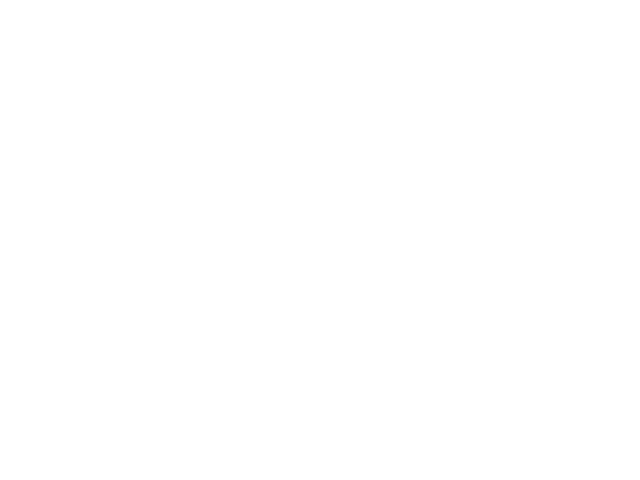

s72_121220_0001soligm
s72_111220_0010soligm
s72_121220_0005soligm
s72_121220_0004soligm
s72_131220_0001soligm
s72_121220_0003soligm
s72_131220_0002soligm
s72_131220_0003soligm


In [15]:
runs = ['s72_121220_0001soligm', 's72_111220_0010soligm', 's72_121220_0005soligm', 's72_121220_0004soligm', 
        's72_131220_0001soligm', 's72_121220_0003soligm', 's72_131220_0002soligm', 's72_131220_0003soligm']

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray']

fig1 = plt.figure()
ax = fig1.add_subplot(111)

for run_id, c in zip(runs, colors):
    
    print(run_id)

    df_run = pd.read_csv(LOGS_DIR + run_id + '_merger_logs.csv')

    df_sliced = df_run[:3002]
    
    time_list = [time for time in df_sliced['time (Myr)']]
    
    sep, mw_common, m31_common = galaxy_com_separation(df_sliced)
    
    #'m31_radvel_factor (* 117 km/s)'
    transvel_factor = df_sliced['m31_transvel_factor (* 42 km/s)'][0]
    
    ax.plot(time_list, sep, c=c, label=str(transvel_factor))
    
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Distance (kpc)')
plt.legend(loc='upper right')
plt.title('IGM center of mass separations')
plt.savefig(OUTPUT_DIR + 'comparison_IGM_separation')
plt.close()

# Separation plots non-IGM

In [67]:
IGM = False

if IGM:
    igm_dir = 'IGM\\'
else:
    igm_dir = 'noIGM\\'

RADVEL = True
TRANSVEL = False

if RADVEL == TRANSVEL:
    raise ValueError('Choose one between costant radial or transverse velocity')
    
if RADVEL:
    vel_dir = 'constant_radial_velocity\\'
    rvel_factor = 0.5
    
if TRANSVEL:
    vel_dir = 'constant_transverse_velocity\\'
    
simulation_dir = igm_dir + vel_dir

full_path = SCRIPT_DIR + simulation_dir

In [68]:
run_list = ['s78_091220_0001st', 's78_091220_0002st', 's78_101220_0001st', 's78_101220_0002st', 's78_101220_0003st',
            's72_091220_0001st', 's72_091220_0002st', 's72_101220_0001st', 's72_101220_0002st', 's72_101220_0003st']

transvel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

c_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

<IPython.core.display.Javascript object>


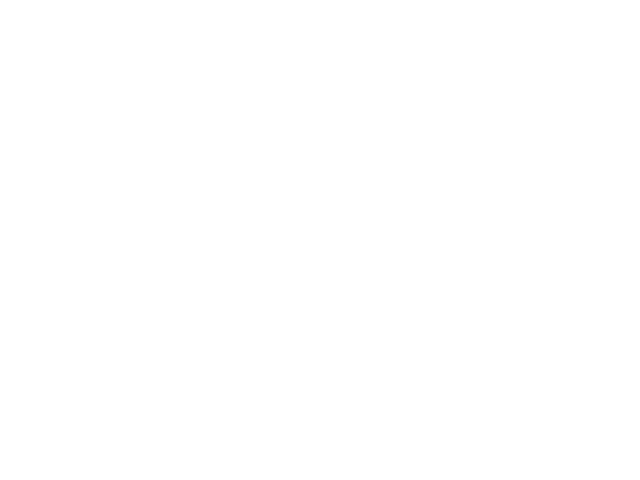

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Separation (Kpc)')

for run_id, tvel_factor, c in zip(run_list, transvel, c_list):
    df2 = pd.read_csv(full_path + run_id + '\\' + run_id + '_separation.csv')
    color = c_list[i]
    ax.plot(df2['time (Myr)'], df2['sep (kpc)'], c=c, label='$f_{t} =$' + str(tvel_factor))

plt.title('Non-IGM center of mass separations, $f_{r} =$' + str(rvel_factor))
plt.legend(loc='upper right')
plt.savefig(OUTPUT_DIR + 'comparison_constant_radvel_noIGM')
plt.close()

In [70]:
run_list = ['d01_091220_0001st', 'd01_101220_0001st', 'd01_101220_0002st', 'd01_101220_0003st', 
            's78_101220_0003st',
            'd01_091220_0002st', 'd01_101220_0004st', 'd01_101220_0005st', 'd01_101220_0006st', 'd01_101220_0007st']

tvel_factor = 0.5
radvel = [0.1, 0.2, 0.3, 0.4, 
          0.5, 
          0.6, 0.7, 0.8, 0.9, 1.0]

<IPython.core.display.Javascript object>


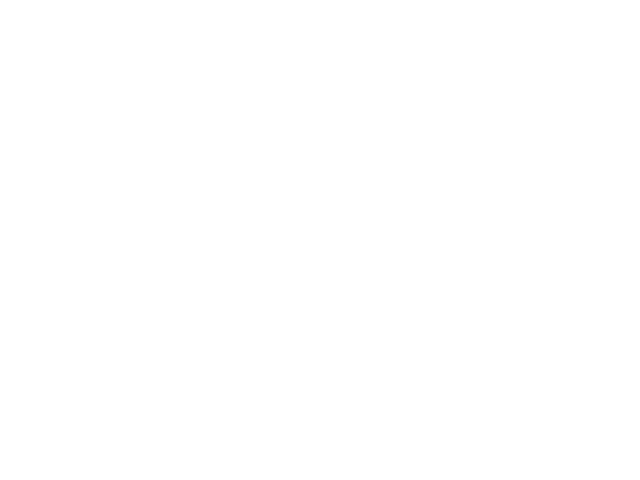

d01_091220_0001st
d01_101220_0001st
d01_101220_0002st
d01_101220_0003st
s78_101220_0003st
d01_091220_0002st
d01_101220_0004st
d01_101220_0005st
d01_101220_0006st
d01_101220_0007st


In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Separation (Kpc)')

for run_id, rvel_factor, c in zip(run_list, radvel, c_list):
    print(run_id)
    
    if run_id.startswith('d01'):
        df2 = pd.read_csv(SCRIPT_DIR + 'noIGM\\constant_transverse_velocity\\' + run_id + '_separation.csv')
    else:
        df2 = pd.read_csv(SCRIPT_DIR + 'noIGM\\constant_radial_velocity\\' + run_id + '\\' + run_id + '_separation.csv')
    
    color = c_list[i]
    ax.plot(df2['time (Myr)'], df2['sep (kpc)'], c=c, label='$f_{r} =$' + str(rvel_factor))

plt.title('Non-IGM center of mass separations, $f_{t} =$' + str(tvel_factor))
plt.legend(loc='upper right')
plt.savefig(OUTPUT_DIR + 'comparison_constant_transvel_noIGM')
plt.close()

# IGM - non-IGM comparison

In [65]:
runs_IGM = ['s72_121220_0004soligm', 's72_131220_0001soligm', 's72_121220_0003soligm']
runs_noIGM = ['s72_131220_0004sol', 's72_131220_0005sol', 's72_121220_0002sol']
tvel_list = [0.8, 0.9, 1.0]

C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<IPython.core.display.Javascript object>


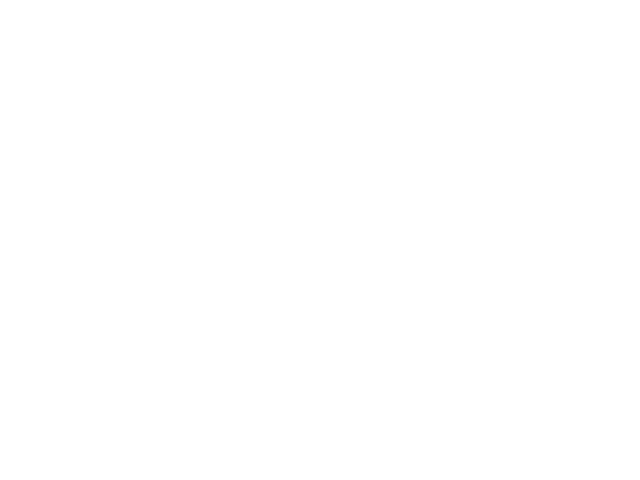

<IPython.core.display.Javascript object>


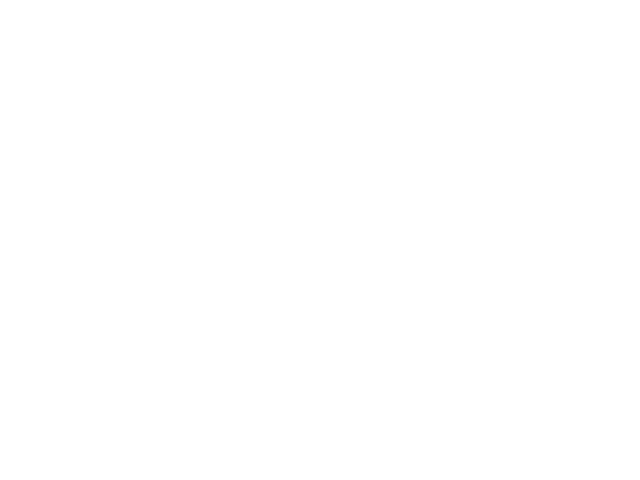

C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<IPython.core.display.Javascript object>


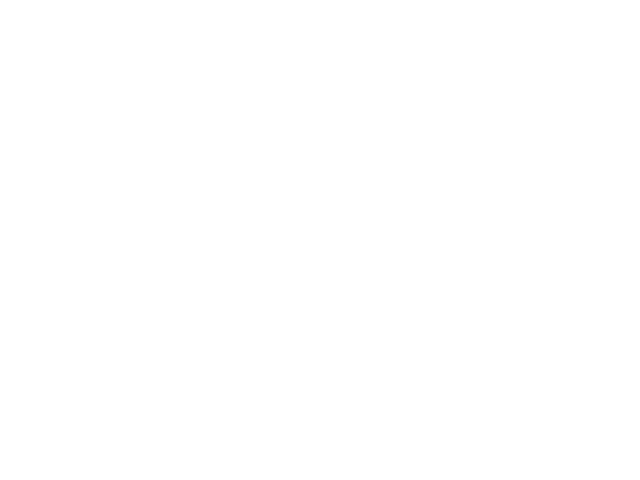

<IPython.core.display.Javascript object>


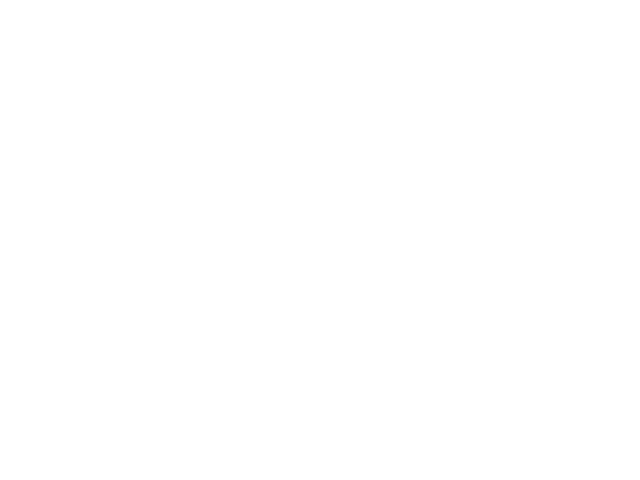

C:\Users\Alberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<IPython.core.display.Javascript object>


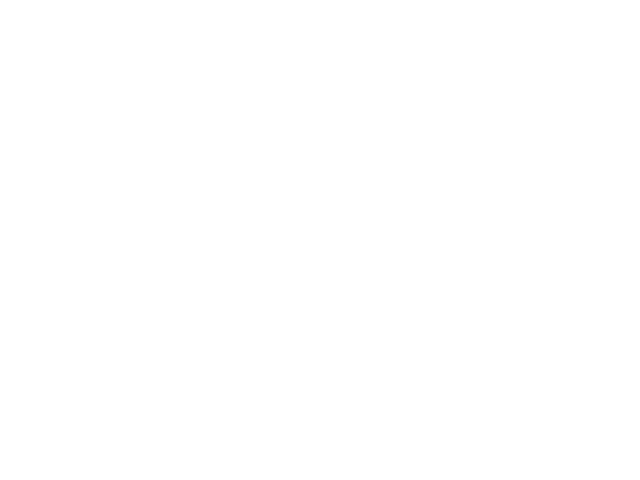

<IPython.core.display.Javascript object>


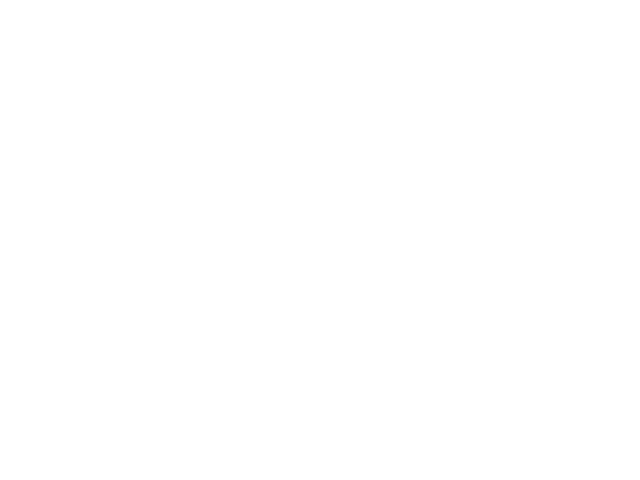

In [66]:
for run_IGM_id, run_noIGM_id, tvel in zip(runs_IGM, runs_noIGM, tvel_list):

    df_run_IGM = pd.read_csv(LOGS_DIR + run_IGM_id + '_merger_logs.csv')
    df_sliced_IGM = df_run_IGM[:3002]
    
    df_run_noIGM = pd.read_csv(LOGS_DIR + run_noIGM_id + '_merger_logs.csv')
    df_sliced_noIGM = df_run_noIGM[:3002]
    
    time_list = [time for time in df_sliced_IGM['time (Myr)']]
    
    #separation comparison
    sep_IGM, mw_common_IGM, m31_common_IGM = galaxy_com_separation(df_sliced_IGM)
    sep_noIGM, mw_common_noIGM, m31_common_noIGM = galaxy_com_separation(df_sliced_noIGM)
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    ax1.plot(time_list, sep_IGM, c='tab:orange', label='Separation of IGM run')
    ax1.plot(time_list, sep_noIGM, c='tab:blue', label='Separation of non-IGM run')

    ax1.set_xlabel('Time (Myr)')
    ax1.set_ylabel('Distance (kpc)')
    plt.legend(loc='upper right')
    plt.title('Center of mass separation IGM\\non-IGM comparison\n' + '$f_{r} =$ 1, $f_{t} =$ ' + str(tvel)) 
    plt.savefig(OUTPUT_DIR + '_separation_IGM_comparison_tvel' + str(tvel).replace('.', ''))
    plt.close()
    
    #galaxy com trajectory comparison

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.set_xlim(-350, 350)
    ax.set_ylim(-350, 350)

    ax.plot(df_sliced_IGM['mw_com_x (kpc)'], df_sliced_IGM['mw_com_y (kpc)'], c='tab:red', label='MW center of mass (IGM)')
    ax.plot(df_sliced_IGM['m31_com_x (kpc)'], df_sliced_IGM['m31_com_y (kpc)'], c='tab:orange', label='M31 center of mass (IGM)')
    
    ax.plot(df_sliced_noIGM['mw_com_x (kpc)'], df_sliced_noIGM['mw_com_y (kpc)'], c='tab:blue', label='MW center of mass (non-IGM)')
    ax.plot(df_sliced_noIGM['m31_com_x (kpc)'], df_sliced_noIGM['m31_com_y (kpc)'], c='tab:cyan', label='M31 center of mass (non-IGM)')

    ax.set_xlabel('X (kpc)')
    ax.set_ylabel('Y (kpc)')
    plt.legend(loc='upper right')
    plt.title('Center of mass xy trajectory IGM\\non-IGM comparison\n' + '$f_{r} =$ 1, $f_{t} =$ ' + str(tvel))
    plt.savefig(OUTPUT_DIR + '_com_trajectory_IGM_comparison_tvel' + str(tvel).replace('.', ''))
    plt.close()

In [ ]:
def plot_sep(ax, sep_dir, color):
    df = pd.read_csv('runs/' + sep_dir + '/merger_separation_' + sep_dir + '.csv')
    ax.plot(df['time (Myr)'], df['sep (kpc)'], c=color, label=sep_dir)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Separation (Kpc)')

i=0
for run_id in run_list:
    #run_dir = simulation_dir + run_id + '\\'
    df2 = pd.read_csv(full_path + run_id + '\\' + run_id + '_separation.csv')
    color = c_list[i]
    ax.plot(df2['time (Myr)'], df2['sep (kpc)'], c=color, label=run_id)
    i += 1
    
plt.legend()
plt.savefig('constant_radvel')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Separation (Kpc)')

i=0
for sep_dir in sep_list4:
    color = c_list[i]
    plot_sep(ax, sep_dir, color)
    i += 1

plt.legend()
plt.savefig('plots\\sep4')

In [ ]:
def solar_system_radii(df, time_index):
    current_row = df.iloc[time_index, :]
    n_tracker = df['n_stars'][0]
    
    current_time = current_row['time (Myr)']
    current_com_x = current_row['mw_com_x (kpc)']
    current_com_y = current_row['mw_com_y (kpc)']
    current_com_z = current_row['mw_com_z (kpc)']
    current_common_com_x = current_row['mw_m31_com_x (kpc)']
    current_common_com_y = current_row['mw_m31_com_y (kpc)']
    current_common_com_z = current_row['mw_m31_com_z (kpc)']
    mw_radii = []
    common_radii = []
    for i in range(n_tracker):
        particle_x = current_row['x_tr_' + str(i).zfill(5) + ' (kpc)']
        particle_y = current_row['y_tr_' + str(i).zfill(5) + ' (kpc)']
        particle_z = current_row['z_tr_' + str(i).zfill(5) + ' (kpc)']
        mw_distance = np.sqrt((current_com_x - particle_x)**2 + (current_com_y - particle_y)**2 + (current_com_z - particle_z)**2)
        common_distance = np.sqrt((current_common_com_x - particle_x)**2 + (current_common_com_y - particle_y)**2 + (current_common_com_z - particle_z)**2)
        mw_radii.append(mw_distance)
        common_radii.append(common_distance)
        
    return mw_radii, common_radii

def solar_histogram(ax, df, time_index, n_tracker=1000):
    radii = solar_system_radii(df, time_index, n_tracker)
    r_std = np.std(radii)
    r_min = min(radii)
    r_max = max(radii)
    ax.hist(radii, bins=50, histtype='step', range=(r_min-r_std,r_max+r_std))

In [ ]:
for time in [7800/5, 8000/5, 9000/5, 10000/5, 11000/5, 12000/5, 13000/5, 14000/5, 14900/5]:
#for time in range(df.shape[0]):       #number of rows in dataframe
    #print(time, flush=True)
    time = int(time)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    solar_histogram(ax, df, time)

    ax.set_xlabel('r')
    ax.set_ylabel('number')
    plt.title('t = {} Myr'.format(time*5))
    plt.savefig('hist_test\\hist_test_' + str(time).zfill(5))
    plt.close()

# Solar System mean distance

In [ ]:
def solar_system_mean_plot(ax, df, c1='tab:blue', c2='tab:orange'):
    
    mean_list = []
    std_list = []
    mean_m_std = []
    mean_p_std = []
    
    mean_common_list = []
    std_common_list = []
    mean_m_std_common = []
    mean_p_std_common = []
    
    time_list = [time for time in df['time (Myr)']]

    for time_idx in range(df.shape[0]):
        print(time_idx, end='\r')
        mw_radii, common_radii = solar_system_radii(df, time_idx)
        mean_list.append(np.mean(mw_radii))
        std_list.append(np.std(mw_radii))
        mean_m_std.append(np.mean(mw_radii) - np.std(mw_radii))
        mean_p_std.append(np.mean(mw_radii) + np.std(mw_radii))
        
        mean_common_list.append(np.mean(common_radii))
        std_common_list.append(np.std(common_radii))
        mean_m_std_common.append(np.mean(common_radii) - np.std(common_radii))
        mean_p_std_common.append(np.mean(common_radii) + np.std(common_radii))
        
    ax.plot(time_list, mean_list, c=c1)
    ax.fill_between(time_list, mean_m_std, y2=mean_p_std, color=c1, alpha=0.2)
    
    ax.plot(time_list, mean_common_list, c=c2)
    ax.fill_between(time_list, mean_m_std_common, y2=mean_p_std_common, color=c2, alpha=0.2) 

In [ ]:
run_id = 's72_111220_0009stigm'
#run_dir = '\\' + igm_dir

df = pd.read_csv(script_dir + igm_dir + run_id + '_merger_logs.csv')

df_sliced = df[:3002]

In [ ]:
df_sliced

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

solar_system_mean_plot(ax, df_sliced)

plt.savefig(run_id + '_solar_system_mean_position')

In [ ]:
#run1 (IGM)
run1_id = 's72_101220_0004stigm'

simulation_dir_run1 = '\\IGM\\constant_radial_velocity\\'
run1_dir = simulation_dir_run1 + run1_id + '\\'
full_path_run1 = script_dir + simulation_dir_run1

df_run1 = pd.read_csv(full_path_run1 + run1_id + '\\' + run1_id + '_solar_position.csv')

#run2 (noIGM)
run2_id = 's78_101220_0003st'

simulation_dir_run2 = '\\noIGM\\constant_radial_velocity\\'
run1_dir = simulation_dir_run2 + run2_id + '\\'
full_path_run2 = script_dir + simulation_dir_run2

df_run2 = pd.read_csv(full_path_run2 + run2_id + '\\' + run2_id + '_solar_position.csv')

fig = plt.figure()
ax = fig.add_subplot(111)

solar_system_mean_plot(ax, df_run1, c='tab:blue')
solar_system_mean_plot(ax, df_run2, c='tab:orange')

plt.savefig('solar_system_mean_position_comparison')

# Animations

In [ ]:
def animation(frame_dir, out_name, fps=20):
    filenames_list = []
    for (dirpath, dirnames, filenames) in os.walk(frame_dir):
        filenames_list.extend(filenames)
        break

    filenames_list.sort()

    writer = imageio.get_writer(out_name, fps=fps)

    for filename in filenames_list:
        if filename.endswith('.png'):
            writer.append_data(imageio.imread(frame_dir + filename))

    writer.close()
    

def find_corrupt_imgs(dir_path):
    for filename in os.listdir(dir_path):
        if filename.endswith('.png'):
            try:
                img = Image.open(dir_path + "\\" + filename) # open the image file
                img.verify() # verify that it is, in fact an image
            except (IOError, SyntaxError) as e:
                print('Bad file:', filename)
                #os.remove(base_dir+"\\"+filename) (Maybe)

In [ ]:
find_corrupt_imgs('hist_test')

In [ ]:
animation('hist_test\\', 'anim_hist_test.mp4')